# Debugging of CBRAIN-CAM crashes

**History of Debug Runs**

- debug01: B001 - Base
    - Crash: day 5
- debug02: 
    - Crash: day 5
- debug03:
    - Crash: day 13
- debug04:
    - Crash: day 2
- debug05:
    - Crash: day 12
- debug06:
    - Crash: day 6
- debug07: B019: no adiab
    - Crash: day 2
- debug08: B020: Network trained with input noise. Max_rs normalization. 
    - Crash: day 4
- debug09: B020 - Additional T output vars (DBGT[1-3]) plus make sure || was working
    - Crash: same as 08
- debug10: Same as 09 but without OMP 

## Setup

Here are some basic diagnostics we should always run: 
- Global mean T and Q
- Min/max T/Q

Unfortunately animations don't work for whatever reason. What a load of bull crap!

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from cbrain.imports import *
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
DATA_DIR = '/scratch/05488/tg847872/cloudbrain_ctrl_aquaplanet_03/'
MEAN_DIR = '/home1/05488/tg847872/tmp/B020_purecrm_essv2_nonorm_sample1_noise1/'
REF_DIR = '/work/05488/tg847872/stampede2/ref/'
#DATA_DIR = '/scratch/srasp/debug/'
#REF_DIR = '/scratch/srasp/Aquaplanet_enhance05/'

In [4]:
def global_mean(ds, var):
    return ds[var].mean(dim=('lat', 'lon', 'lev')) 

In [5]:
def plot_global_means(ds):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    axes[0].plot(global_mean(ds, 'TAP'))
    axes[1].plot(global_mean(ds, 'QAP'))
    plt.show()

In [6]:
def plot_time_lev(ds, var, func=np.mean, **kwargs):
    fig = plt.figure(figsize=(12, 5))
    plt.imshow(func(ds[var], axis=(2, 3)).T, **kwargs)
    plt.colorbar(shrink=0.3);
    plt.show()

In [7]:
def plot_lat_lon(ds, var, itime, ilev):
    fig = plt.figure(figsize=(8, 5))
    plt.imshow(ds[var][itime, ilev])
    plt.colorbar(shrink=0.5);
    plt.show()

In [8]:
def normalize(x, m, s):
    return (x - m[:, None, None]) / s[:, None, None]

In [9]:
def get2Didxs(a, func): return(np.unravel_index(func(a), a.shape))

In [10]:
def get_cb_inps(t, norm=True):
    x = np.concatenate(
        [ds['NNTC'][t], ds['NNQC'][t], ds['NNVC'][t], ds['dTdtadia'][t], ds['dQdtadia'][t],
         np.expand_dims(ds['NNPS'][t], 0), np.expand_dims(ds['NNSOLIN'][t], 0)]
    )
    return normalize(x) if norm else x

In [11]:
def get_cb_inps_all(norm=True):
    x = np.concatenate(
        [ds['NNTC'], ds['NNQC'], ds['NNVC'], ds['dTdtadia'], ds['dQdtadia'],
         np.expand_dims(ds['NNPS'], 1), np.expand_dims(ds['NNSOLIN'], 1)],
        axis=1)
    return normalize(x) if norm else x

In [12]:
def animate_lat_lon(a, var, ilev, interval=100, **kwargs):
    if type(a) == np.ndarray:
        a = a
    else: 
        a = a[var]
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    I = ax.imshow(a[1, ilev], **kwargs)
    cb = fig.colorbar(I, ax=ax, shrink=0.7)
    ax.set_title(f'Step 1')
    def update(i):
        ax.set_title(f'Step {i}')
        I.set_data(a[i, ilev])
        return I
    plt.close(fig)
    return FuncAnimation(fig, update, frames=np.arange(1, a.shape[0]), interval=interval)

In [13]:
def basics(debug, ref=False):
    if not ref: ds = xr.open_mfdataset(f'{DATA_DIR}*{debug}*', decode_times=False)
    else: ds = xr.open_mfdataset(f'{REF_DIR}AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-0[1-5]-00000.nc', decode_times=False)
    plot_global_means(ds)
    plot_time_lev(ds, 'TAP', np.max)
    plot_time_lev(ds, 'QAP', np.max)
    return ds

## Reference run

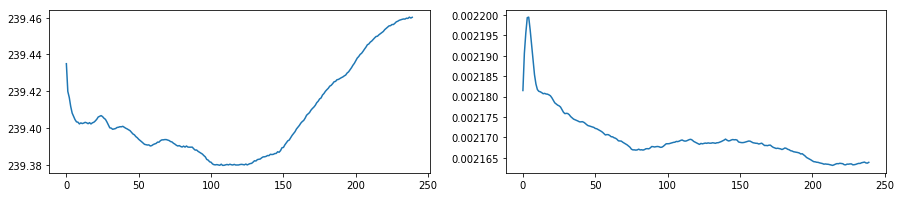

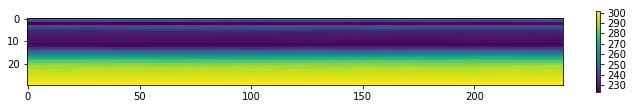

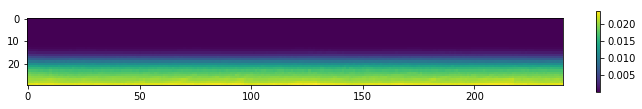

In [25]:
dref = basics('', True)

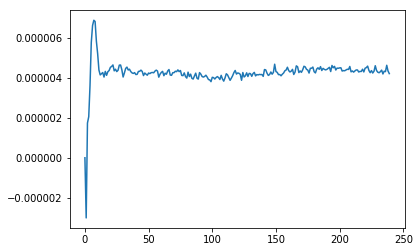

In [15]:
plt.plot(global_mean(dref, 'SPDT'))

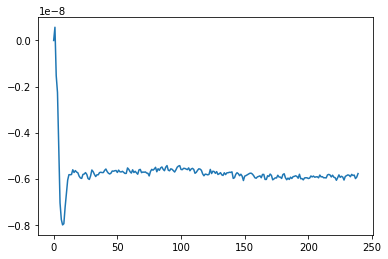

In [16]:
plt.plot(global_mean(dref, 'SPDQ'))

## Debug runs

### Debug 1

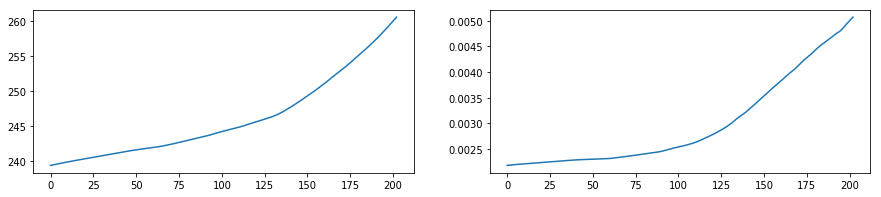

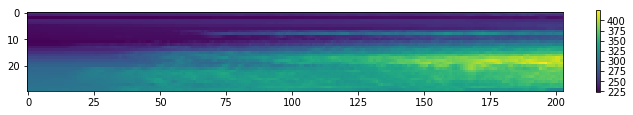

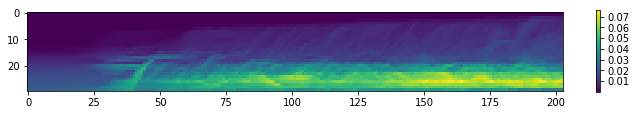

In [17]:
d1 = basics('debug01')

### Debug 2

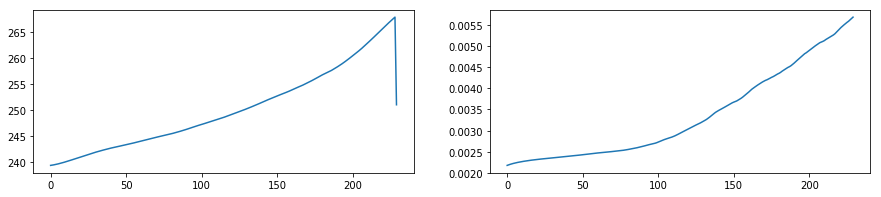

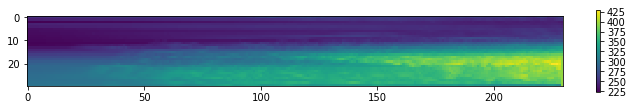

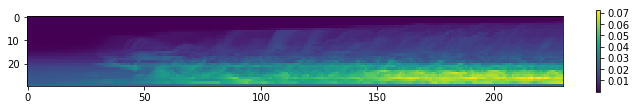

In [18]:
d2 = basics('debug02')

### Debug 3

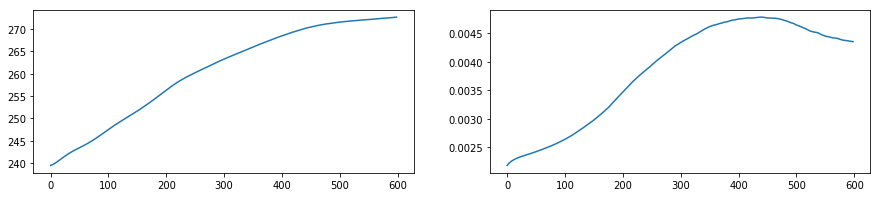

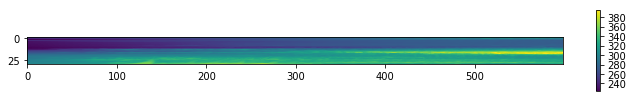

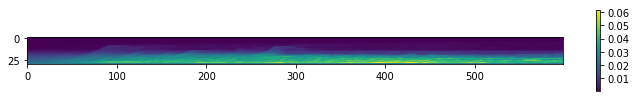

In [19]:
d3 = basics('debug03')

### Debug 4

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


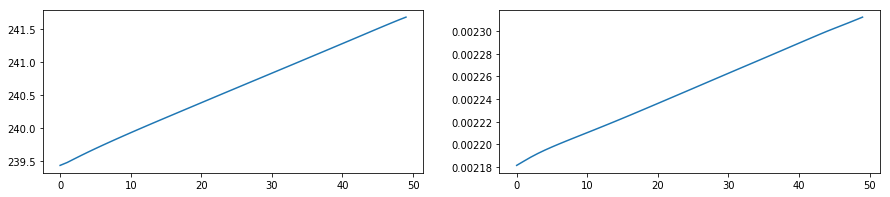

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


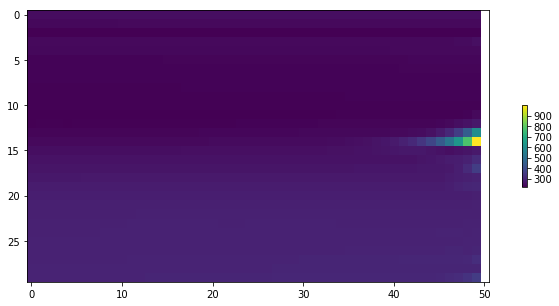

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


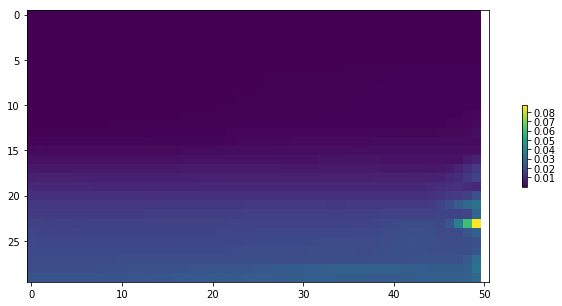

In [20]:
d4 = basics('debug04')

### Debug 5

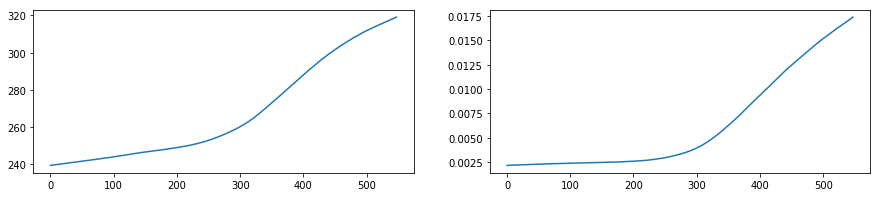

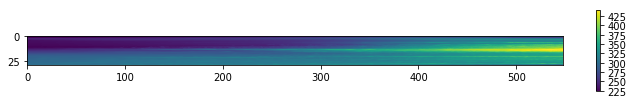

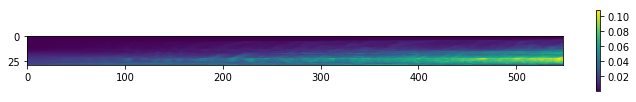

In [21]:
d5 = basics('debug05')

### Debug 6

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


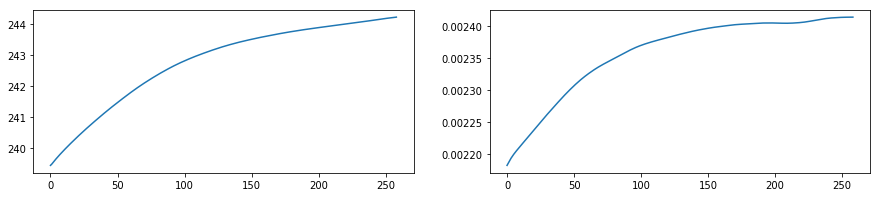

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


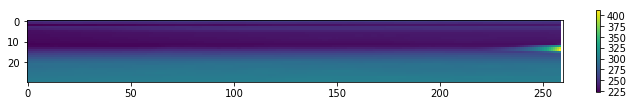

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


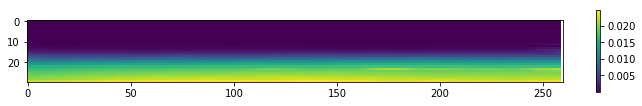

In [22]:
d6 = basics('debug06')

### Debug 7

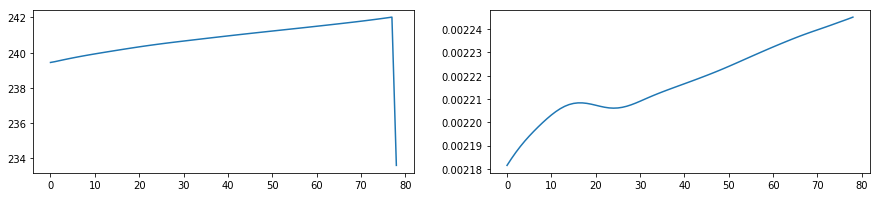

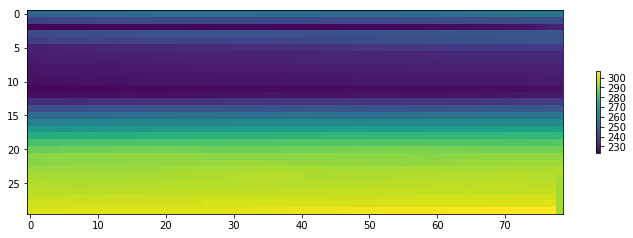

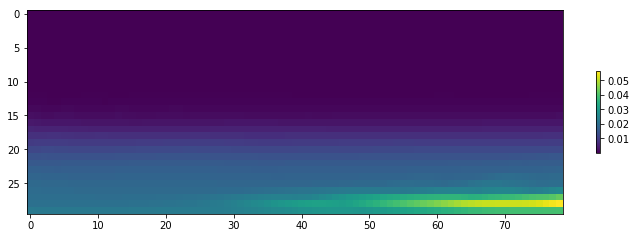

In [23]:
d7 = basics('debug07')

### Debug 8

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


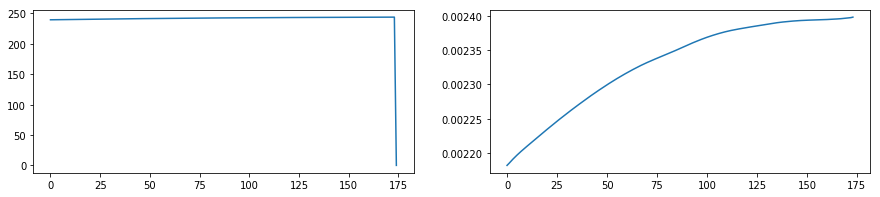

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


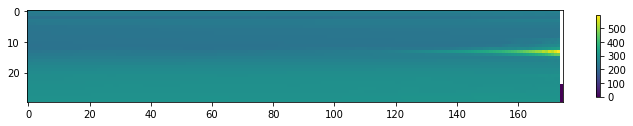

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


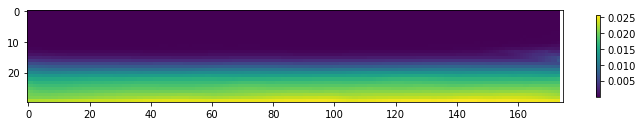

In [24]:
d8 = basics('debug08')

#### Why is is continuously getting warmer and moister?

In [25]:
def compare_global_means(ddebug, var):
    if var == 'SPDT': debug_var = 'BRAINDT'
    elif var == 'SPDQ': debug_var = 'BRAINDQ'
    else: debug_var = var
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    axes[0].plot(global_mean(dref, var), label='ref')
    axes[0].plot(global_mean(ddebug, debug_var)[:-1], label='cbrain')
    axes[0].legend()
    diff = ddebug[debug_var].mean(dim=('lat', 'lon'))[:-1] - dref[var].mean(dim=('lat', 'lon'))
    mx = np.max(np.abs(diff)) * 0.5
    I = axes[1].imshow(diff.T, cmap='bwr', vmin=-mx, vmax=mx, aspect=2)
    fig.colorbar(I, ax=axes[1], orientation='horizontal')
    plt.show()

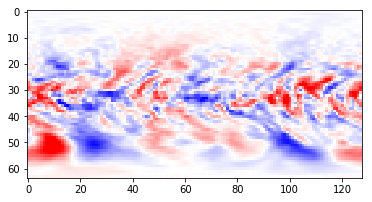

In [219]:
plt.imshow(dref['TAP'].diff(dim='time').isel(time=2, lev=5), cmap='bwr', vmin=-0.3,vmax=0.3)

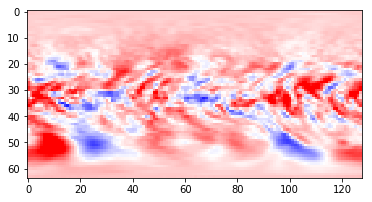

In [220]:
plt.imshow(d8['TAP'].diff(dim='time').isel(time=2, lev=5), cmap='bwr',vmin=-0.3,vmax=0.3)

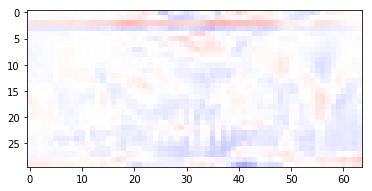

In [221]:
plt.imshow(dref['TAP'].diff(dim='time').isel(time=2).mean('lon'), cmap='bwr',vmin=-0.3,vmax=0.3)

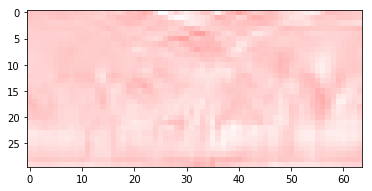

In [218]:
plt.imshow(d8['TAP'].diff(dim='time').isel(time=2).mean('lon'), cmap='bwr',vmin=-0.3,vmax=0.3)

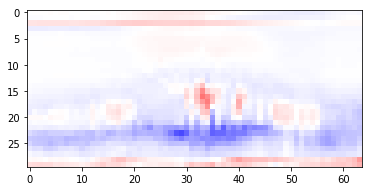

In [217]:
plt.imshow(dref['TPHYSTND'].isel(time=1).mean('lon')*1800, cmap='bwr',vmin=-0.3,vmax=0.3)

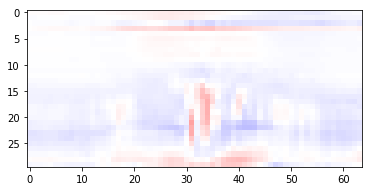

In [216]:
plt.imshow(d8['TPHYSTND'].isel(time=1).mean('lon')*1800, cmap='bwr',vmin=-0.3,vmax=0.3)

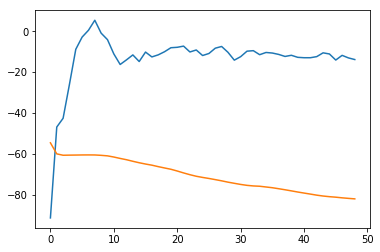

In [161]:
plt.plot(a); plt.plot(b)

In [196]:
lvl=28

In [197]:
diff = d8['TAP'].diff(dim='time').isel(time=1, lev=lvl)- dref['TAP'].diff(dim='time').isel(time=1, lev=lvl)

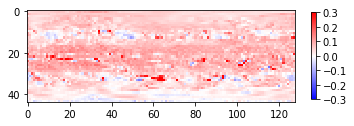

In [198]:
plt.imshow(diff, cmap='bwr',vmin=-0.3,vmax=0.3)
plt.colorbar(shrink=0.4)

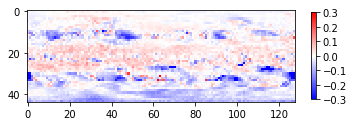

In [202]:
plt.imshow((d8['TPHYSTND'].isel(time=1, lev=lvl) - dref['TPHYSTND'].isel(time=1, lev=lvl))*1800,
           cmap='bwr',vmin=-0.3,vmax=0.3)
plt.colorbar(shrink=0.4)

In [ ]:
plt.imshow((d8['PS'].isel(time=3)

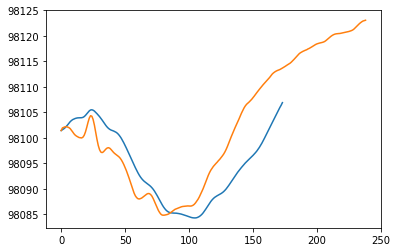

In [211]:
plt.plot(d8['PS'].mean(dim=('lat', 'lon'))[1:])
plt.plot(dref['PS'].mean(dim=('lat', 'lon'))[1:])

In [212]:
dref

<xarray.Dataset>
Dimensions:       (crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 240)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...
Dimensions

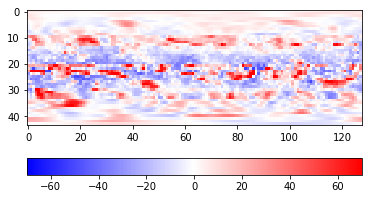

In [208]:
plt.imshow((d8['PS'].isel(time=10) - dref['PS'].isel(time=10)),
           cmap='bwr', vmin=-70, vmax=70)
plt.colorbar(orientation='horizontal')

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


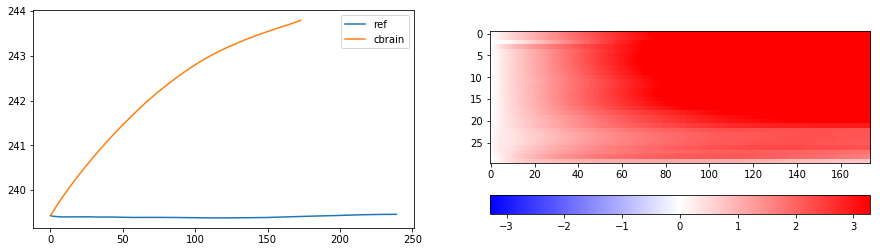

In [26]:
compare_global_means(d8, 'TAP')

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


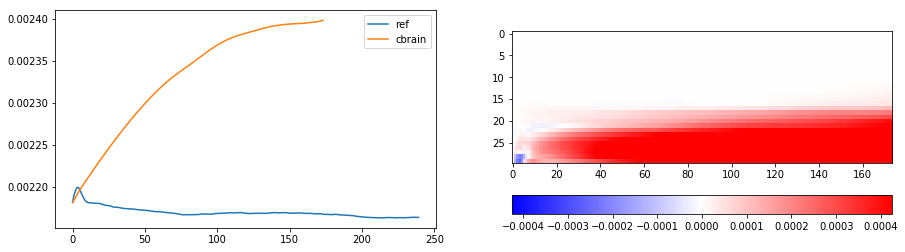

In [27]:
compare_global_means(d8, 'QAP')

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


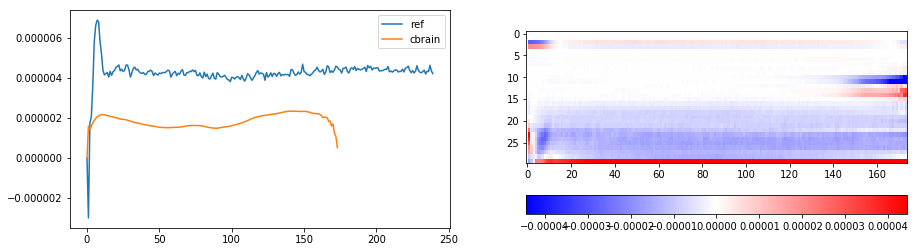

In [28]:
compare_global_means(d8, 'SPDT')

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


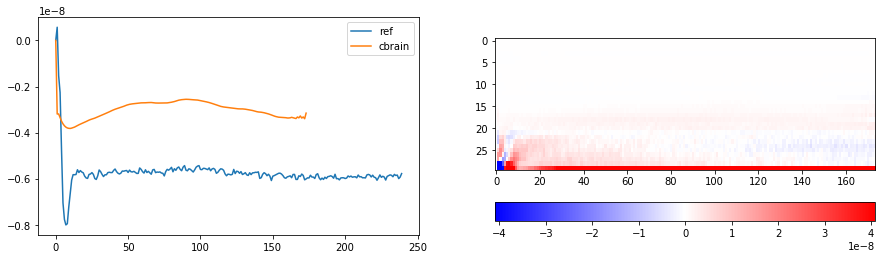

In [29]:
compare_global_means(d8, 'SPDQ')

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


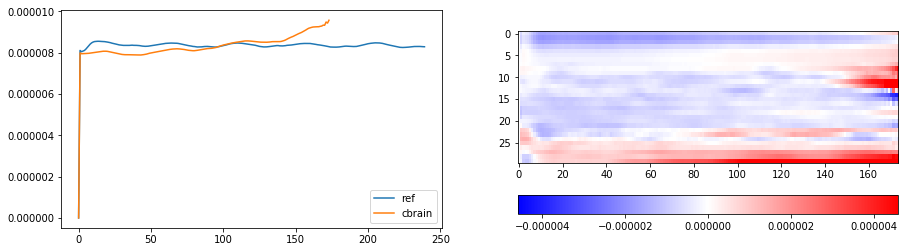

In [30]:
compare_global_means(d8, 'QRS')

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


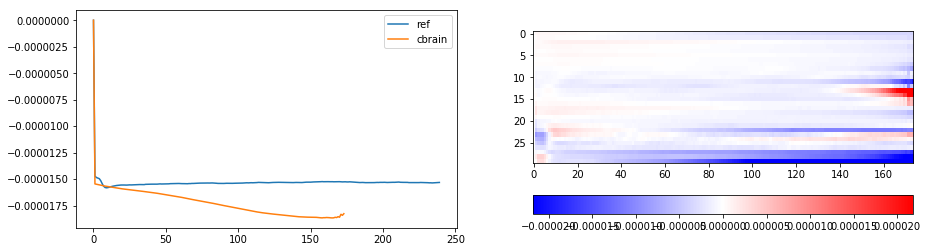

In [31]:
compare_global_means(d8, 'QRL')

/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


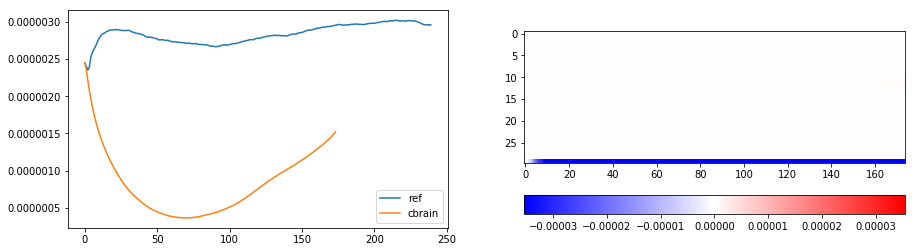

In [32]:
compare_global_means(d8, 'DTV')

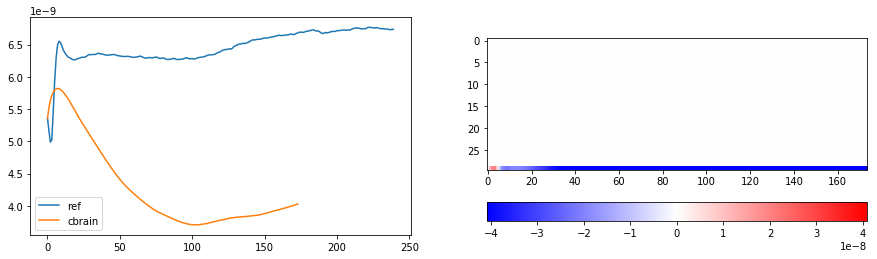

In [33]:
compare_global_means(d8, 'VD01')

The radiative tendencies are not the problem I think. It is getting much much warmer immediately and also much much moister after some inital drying. This does not necessarily correspont with SPDT, SPTQ. So what is going on?

#### How bad is energy conservation violated?
Approximately:
`vint(SPDT) * C_P = - vint(SPDQ) * L_V`

In [116]:
def get_P_from_ds(ds):
    return ds.P0 * ds.hyai + ds.PS * ds.hybi

In [117]:
def get_dP_from_ds(ds):
    p = get_P_from_ds(ds)
    p_diff = p.diff(dim='ilev')
    return p_diff.rename({'ilev':'lev'})

In [118]:
def vint(ds, var, factor):
    dP = get_dP_from_ds(ds)
    x = ds[var]
    dP['lev'] = x['lev']
    return (dP * x * factor / G).sum(dim='lev')

In [119]:
def check_energy(ds, t=0):
    varT = 'BRAINDT' if hasattr(ds, 'BRAINDT') else 'SPDT'
    varQ = 'BRAINDQ' if hasattr(ds, 'BRAINDQ') else 'SPDQ'
    vintT = vint(ds.isel(time=t), varT, C_P).values
    vintQ = vint(ds.isel(time=t), varQ, L_V).values
    plt.scatter(vintT.reshape(-1), -vintQ.reshape(-1))
    plt.xlabel(f'vint({varT})*C_P'); plt.ylabel(f'vint({varQ})*L_V')
    plt.show()

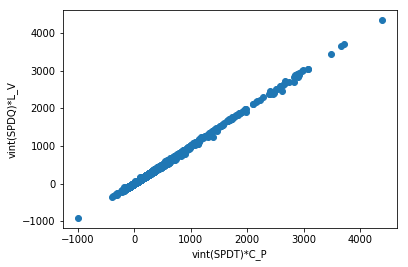

In [163]:
check_energy(dref, 100)

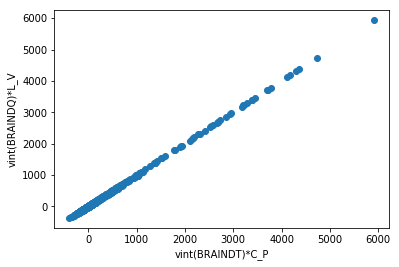

In [162]:
check_energy(d8, 100)

In [110]:
def compare_global_energy(ddebug, var, factor, time=range(1, 50)):
    if var == 'SPDT': debug_var = 'BRAINDT'
    elif var == 'SPDQ': debug_var = 'BRAINDQ'
    else: debug_var = var
    a = vint(dref.isel(time=time), var, factor).mean(dim=('lat', 'lon'))
    b = vint(ddebug.isel(time=time), debug_var, factor).mean(dim=('lat', 'lon'))
    plt.plot(a, label='ref')
    plt.plot(b, label='cbrain')
    plt.legend(); plt.show()

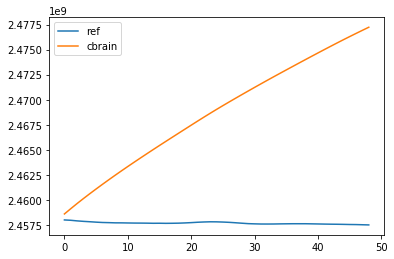

In [135]:
compare_global_energy(d8, 'TAP', C_P)

In [111]:
def vint_mean(ds, var, factor=C_P, time=range(1, 50)):
    return vint(ds.isel(time=time), var, factor).mean(dim=('lat', 'lon'))

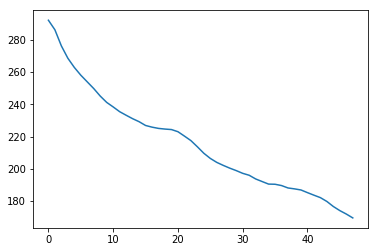

In [155]:
plt.plot(vint_mean(d8, 'TAP').diff(dim='time') / 1800.)

So the static energy increases by around 200 units??? per second.

In [158]:
a = vint_mean(dref, 'SPDT') + vint_mean(dref, 'QRS')+ vint_mean(dref, 'QRL')+ vint_mean(dref, 'DTV')

In [160]:
b = vint_mean(d8, 'BRAINDT') + vint_mean(d8, 'QRS')+ vint_mean(d8, 'QRL')+ vint_mean(d8, 'DTV')

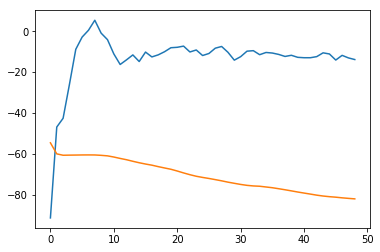

In [161]:
plt.plot(a); plt.plot(b)

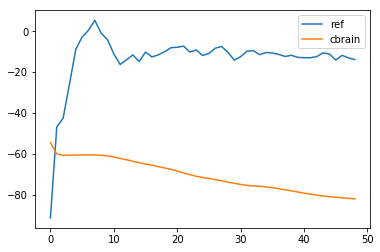

In [170]:
compare_global_energy(d8, 'TPHYSTND', C_P)

So if anything we should be losing static energy...

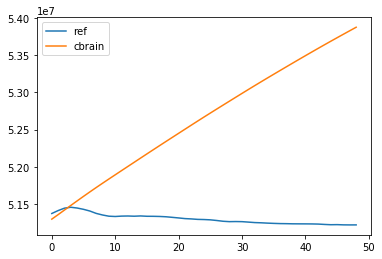

In [137]:
compare_global_energy(d8, 'QAP', L_V)

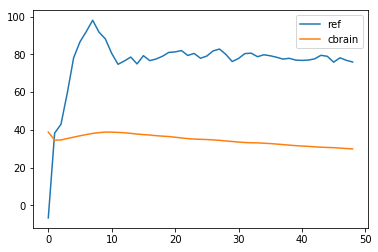

In [138]:
compare_global_energy(d8, 'SPDT', C_P)

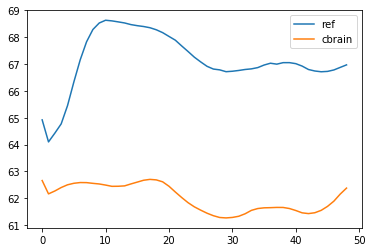

In [139]:
compare_global_energy(d8, 'QRS', C_P)

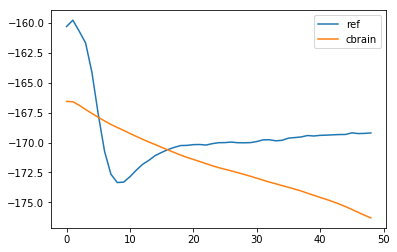

In [140]:
compare_global_energy(d8, 'QRL', C_P)

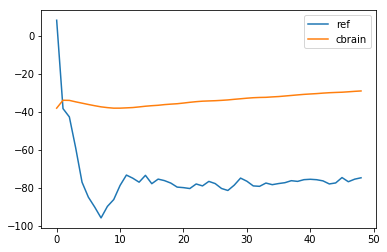

In [141]:
compare_global_energy(d8, 'SPDQ', L_V)

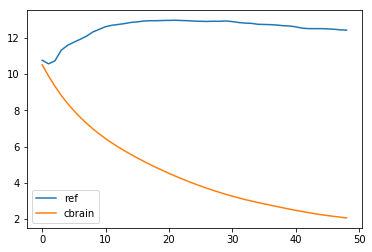

In [142]:
compare_global_energy(d8, 'DTV', C_P)

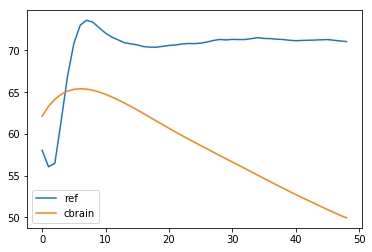

In [144]:
compare_global_energy(d8, 'VD01', L_V)

### Debug 9m - additional output

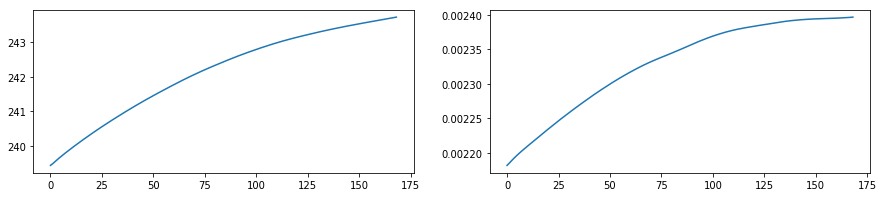

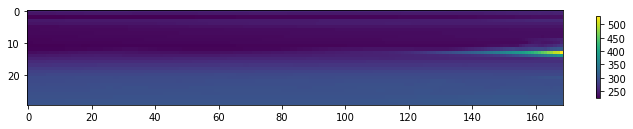

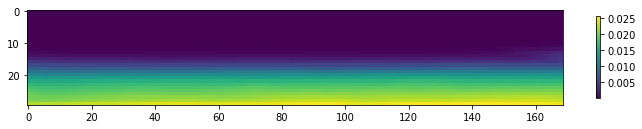

In [26]:
d9 = basics('debug09')

#### Check whether TE vars are 0

In [31]:
d9['TEOUT']

<xarray.DataArray 'TEOUT' (time: 169, lat: 64, lon: 128)>
dask.array<shape=(169, 64, 128), dtype=float32, chunksize=(48, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...
Attributes:
    units:        W/m2
    long_name:    Total energy of physics output
    cell_method:  time: mean

In [34]:
d9['TEOUT'].isel(time=1).mean().compute()

<xarray.DataArray 'TEOUT' ()>
array(3.228788e+09, dtype=float32)
Coordinates:
    time     float64 0.02083

In [35]:
d9['TEINP']

<xarray.DataArray 'TEINP' (time: 169, lat: 64, lon: 128)>
dask.array<shape=(169, 64, 128), dtype=float32, chunksize=(48, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...
Attributes:
    units:        W/m2
    long_name:    Total energy of physics input
    cell_method:  time: mean

In [127]:
d9['TEINP'].isel(time=1).mean().compute()

<xarray.DataArray 'TEINP' ()>
array(3.229463e+09, dtype=float32)
Coordinates:
    time     float64 0.02083

In [38]:
d9['TEFIX']

<xarray.DataArray 'TEFIX' (time: 169, lat: 64, lon: 128)>
dask.array<shape=(169, 64, 128), dtype=float32, chunksize=(48, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...
Attributes:
    units:        W/m2
    long_name:    Total energy after fixer
    cell_method:  time: mean

In [37]:
d9['TEFIX'].isel(time=1).mean().compute()

<xarray.DataArray 'TEFIX' ()>
array(3.229463e+09, dtype=float32)
Coordinates:
    time     float64 0.02083

So TEOUT and TEINP are the same, but TEFIX isn't. Let's go back to the code and check out what these are. Note that TEFIX is larger than INP and OUT

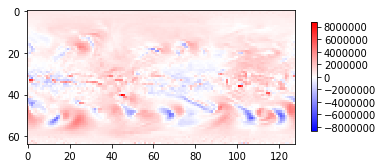

In [100]:
mx = np.abs((d9['TEFIX'].isel(time=1) - d9['TEOUT'].isel(time=1))).max()
plt.imshow(d9['TEFIX'].isel(time=1) - d9['TEOUT'].isel(time=1), vmin=-mx, vmax=mx, cmap='bwr')
plt.colorbar(shrink=0.5)

In [123]:
dTEFIX = (d9['TEFIX'] - d9['TEOUT']).mean(dim=('lat', 'lon')).compute()

In [124]:
dS = vint_mean(d9, 'TAP').diff(dim='time').compute()

In [125]:
dME = vint_mean(d9, 'QAP', L_V).diff(dim='time').compute()

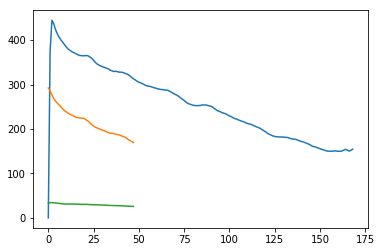

In [126]:
plt.plot(dTEFIX/1800., label='dTEFIX')
plt.plot(dS / 1800., label='dS')
plt.plot(dME / 1800., label='dME')

#### Check debug T variables
Focus on timestep one!

In [51]:
TAP = d9['TAP'].isel(time=1)
TPHYSTOT = d9['TPHYSTND'].isel(time=1)*1800.
DTV = d9['DTV'].isel(time=1)

In [63]:
BRAINDT = d9['BRAINDT'].isel(time=1)
QRS = d9['QRS'].isel(time=1)
QRL = d9['QRL'].isel(time=1)

In [41]:
TBP = TAP - TPHYSTOT

In [86]:
ACTDT = d9['TAP'].diff(dim='time').isel(time=1)

In [43]:
DBGT1, DBGT2, DBGT3 = [d9[v].isel(time=1) for v in ['DBGT1', 'DBGT2', 'DBGT3']]

In [101]:
def imcb(x, lvl=20, mx=None):
    mx = np.max(np.abs(x)) if mx is None else mx
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    I = axes[0].imshow(x.isel(lev=lvl), vmin=-mx, vmax=mx, cmap='bwr')
    fig.colorbar(I, ax=axes[0], orientation='horizontal')
    I = axes[1].imshow(x.mean(dim=('lon')), vmin=-mx, vmax=mx, cmap='bwr')
    fig.colorbar(I, ax=axes[1], orientation='horizontal')

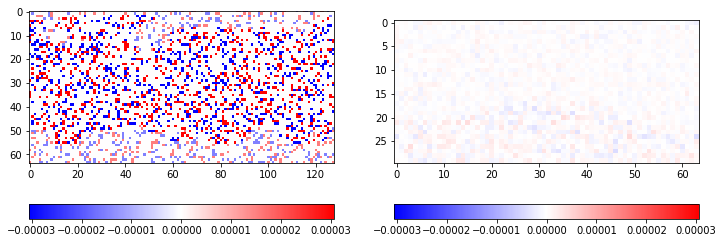

In [61]:
# DBGT1 should be equal to TBP
imcb((DBGT1 - TBP))

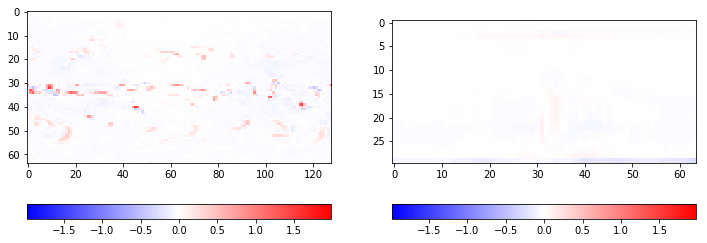

In [62]:
# What happens between DBGT1 and DBGT2 --> tphysbc
imcb(DBGT2 - DBGT1)

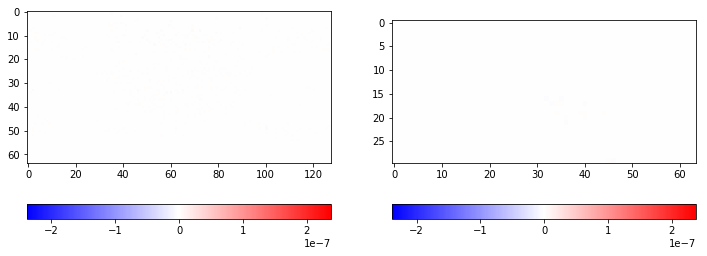

In [147]:
imcb(TPHYSTOT - (BRAINDT + QRS + QRL+ DTV)*1800., 5)

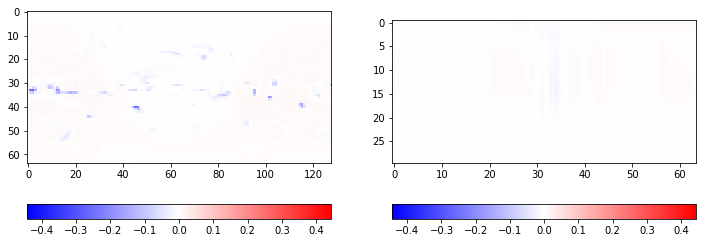

In [106]:
# So this should be equal to BRAINDT + QRS + QRL
imcb((DBGT2 - DBGT1) - (BRAINDT + QRS + QRL)*1800., 5)

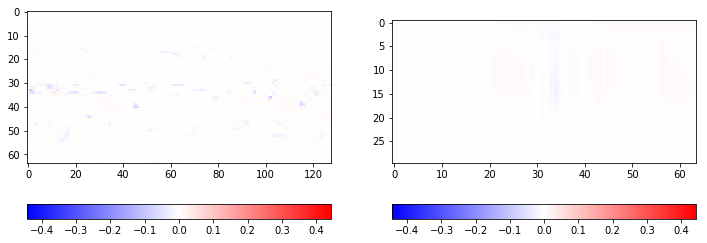

In [68]:
# This should also be equal to TAP - DTV
imcb(DBGT2 - (TAP - DTV*1800.))

There seems to be something else going on here. Could it be the energy fixer?

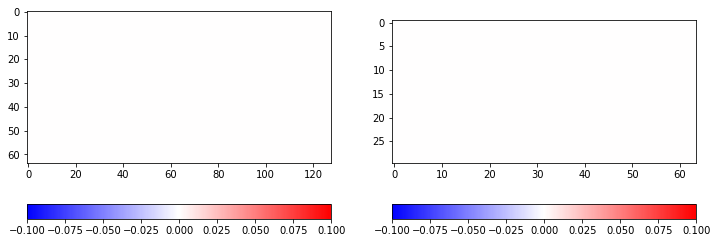

In [72]:
# DBGT3 should be DBGT2
imcb(DBGT2 - DBGT3)

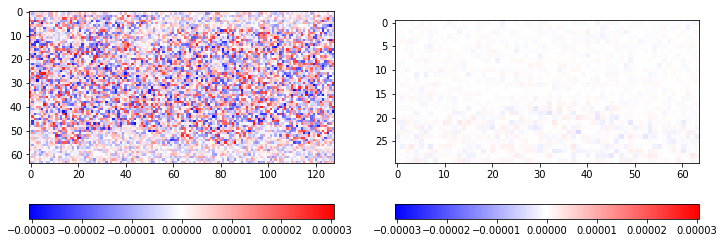

In [73]:
# TPHYSTOT should be TAP - DBGT1
imcb(TPHYSTOT - (TAP - DBGT1))

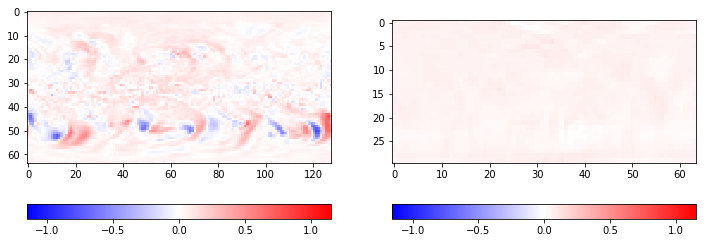

In [87]:
# But then I look at the actual field
imcb(ACTDT)

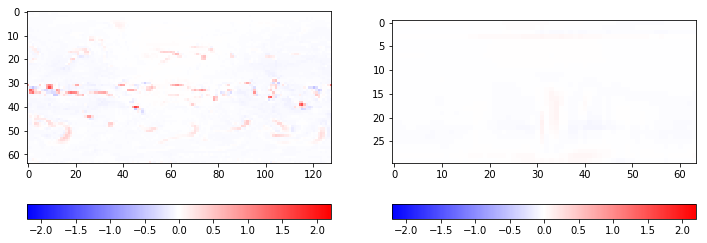

In [75]:
imcb(TPHYSTOT)

So there is a 0.1K warming pretty uniformly, which I cannot account for. 

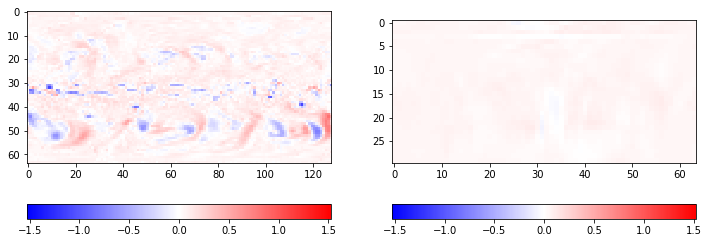

In [90]:
# The warming should happen between TAP[t-1] and DBGT1[t]
tmp = d9['DBGT1'].isel(time=1) - d9['TAP'].isel(time=0)
imcb(tmp)

So there is uniform heating that happens outisde physpkg!?

### Debug10 - no OMP

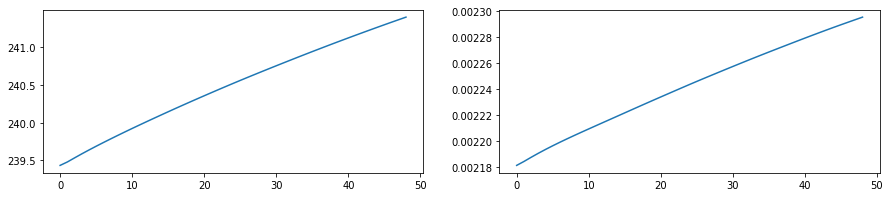

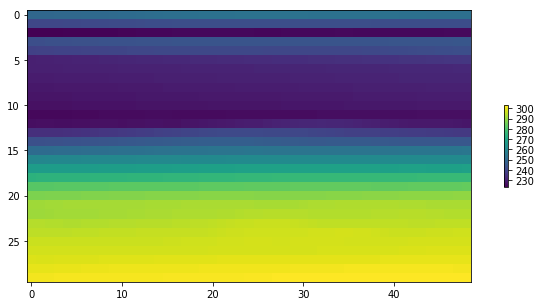

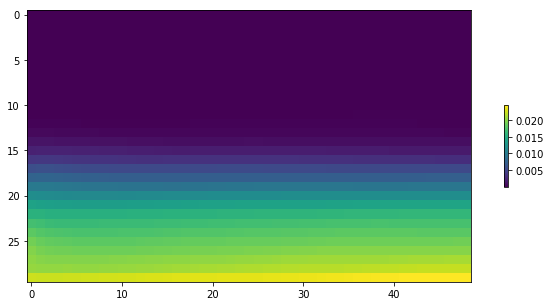

In [77]:
d10 = basics('debug10')

### Debug 11 - SP reference

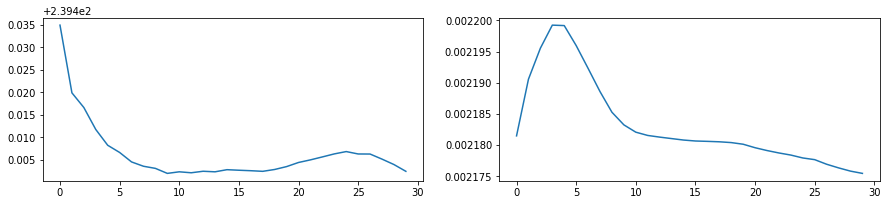

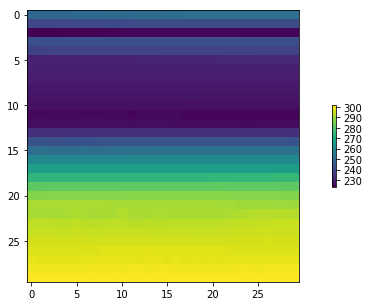

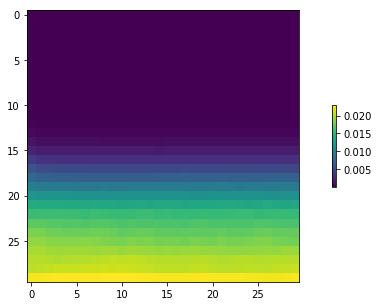

In [83]:
d11 = basics('debug11')

### Debug 12 - endif check

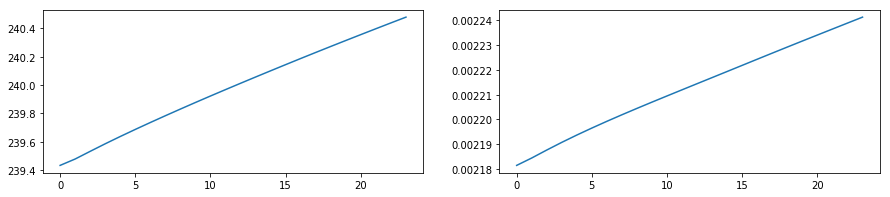

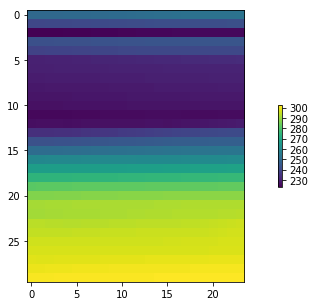

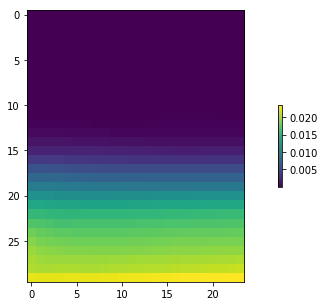

In [85]:
d12 = basics('debug12')

### Debug 13 - additional pd_coupling output

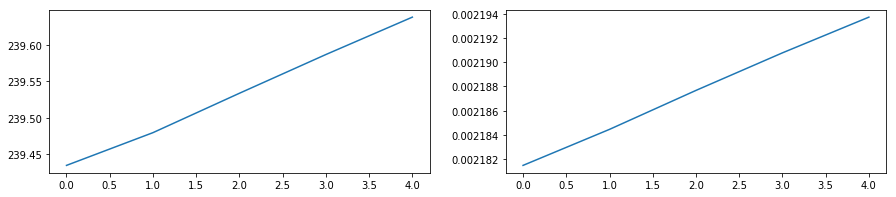

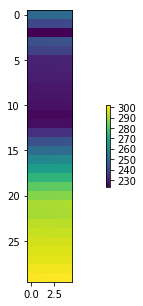

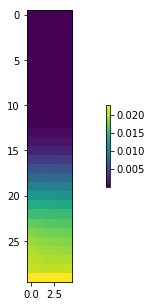

In [91]:
d13 = basics('debug13')

#### Check out DBGT4 and TTEND

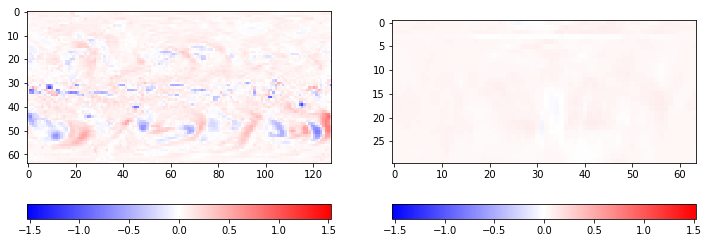

In [93]:
imcb(d13['TTEND'].isel(time=1)*1800)

So TTEND reflects this warming

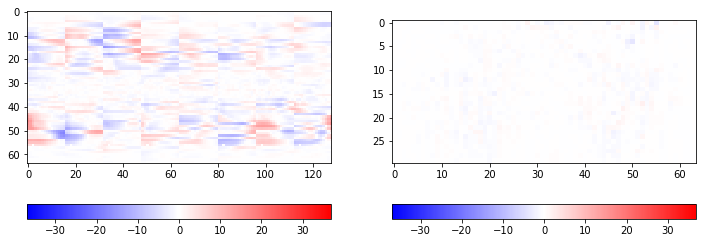

In [97]:
#DBGT4 is t3 in d_p_coupling
#So it should be equal to TBP
imcb(d13['DBGT4'].isel(time=1)-TBP)

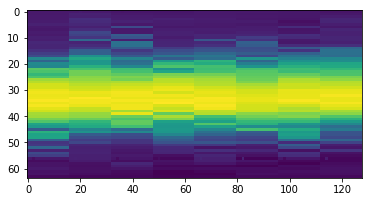

In [96]:
plt.imshow(d13['DBGT4'].isel(time=1, lev=25))

That's odd. I engeneered this parallel to TTEND in the code??

### Debug 14 - just a print statement

### Debug 15 - tend outputs at the end of tphystnd

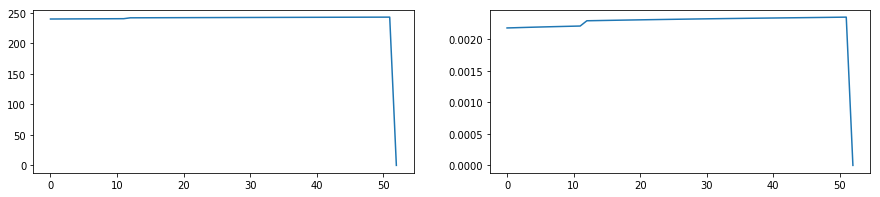

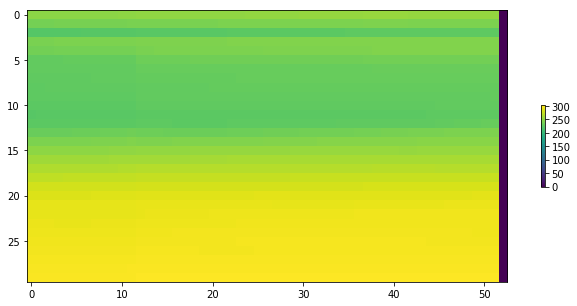

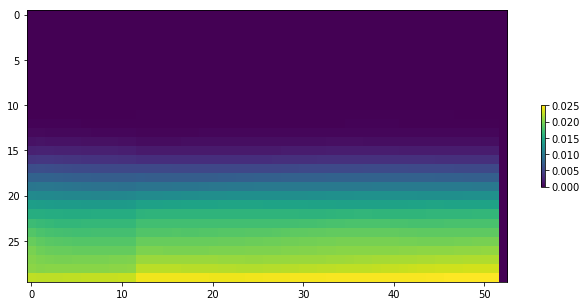

In [141]:
d15 = basics('debug15')

In [142]:
d15

<xarray.Dataset>
Dimensions:       (crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 53)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...
Dimensions 

In [143]:
# DBGT5 is tend%dtdt which should be approx BRAINDT + QRL + QRS
DBGT5 = d15['DBGT5'].isel(time=1)

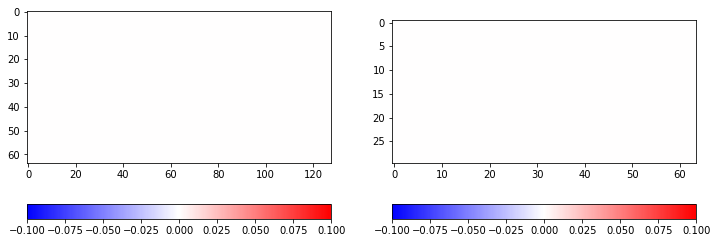

In [144]:
imcb(DBGT5)

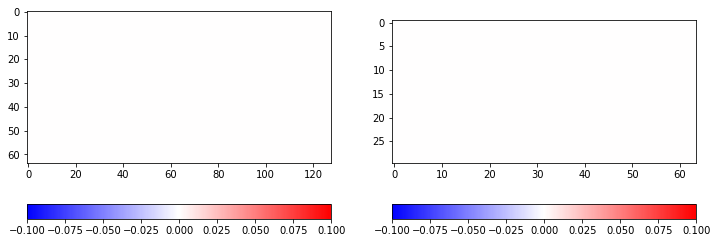

In [145]:
DBGT6 = d15['DBGT6'].isel(time=1)
imcb(DBGT6)

### Debug 16 - energy check around brain

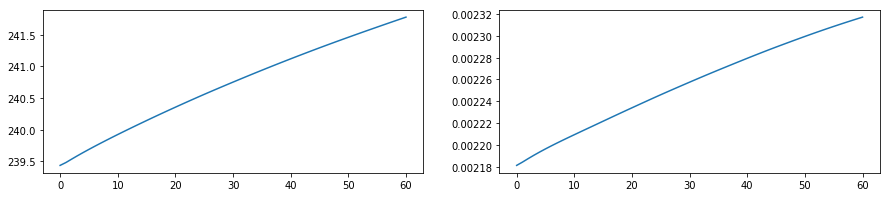

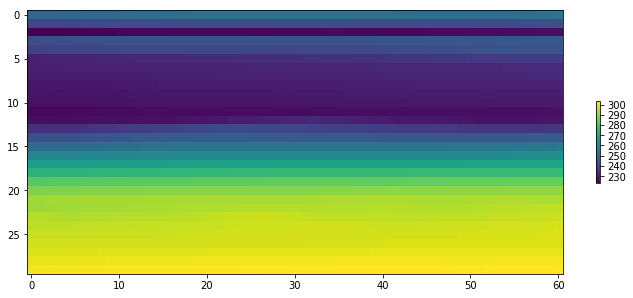

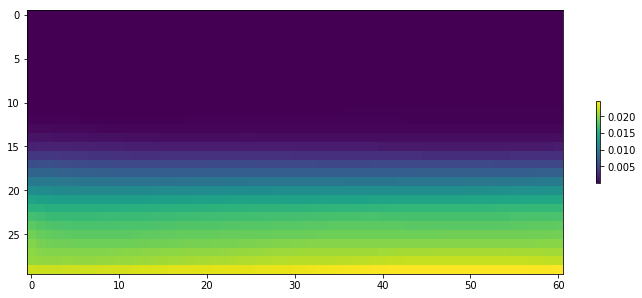

In [156]:
d16 = basics('debug16')

In [149]:
d16

<xarray.Dataset>
Dimensions:       (crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 11)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...
Dimensions 

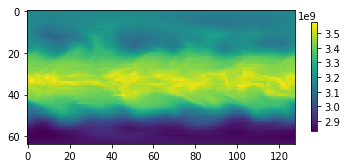

In [151]:
plt.imshow(d16['TEPRE'].isel(time=1)); plt.colorbar(shrink=0.5);

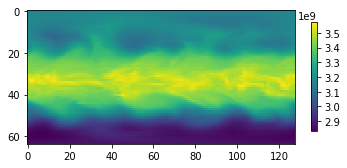

In [152]:
plt.imshow(d16['TEPOST'].isel(time=1)); plt.colorbar(shrink=0.5);

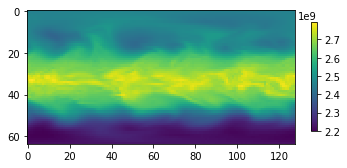

In [182]:
plt.imshow(vint(d16.isel(time=1), 'TAP', C_P) + vint(d16.isel(time=1), 'QAP', L_V))
plt.colorbar(shrink=0.5);

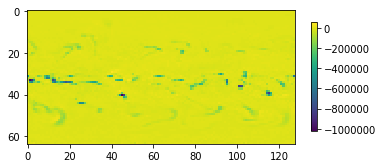

In [154]:
plt.imshow(d16['TEPOST'].isel(time=1) - d16['TEPRE'].isel(time=1)); 
plt.colorbar(shrink=0.5);

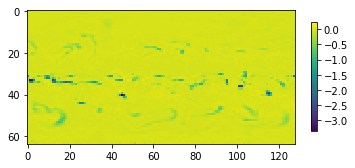

In [155]:
plt.imshow(d16['TWPOST'].isel(time=1) - d16['TWPRE'].isel(time=1)); 
plt.colorbar(shrink=0.5);

So we are losing energy and moisture when bracketing the update from the cbrain predictions. This somehow doesn't really make sense.

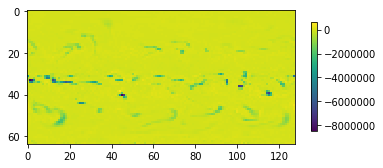

In [185]:
plt.imshow(-vint(d16.isel(time=1), 'BRAINDT', C_P)*1800.)
plt.colorbar(shrink=0.5);

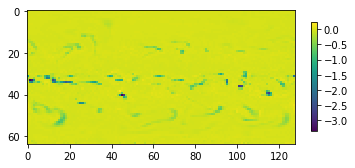

In [187]:
plt.imshow(vint(d16.isel(time=1), 'BRAINDQ', 1)*1800)
plt.colorbar(shrink=0.5);

So BRAINDT and BRAINDQ somewhat balance (and remember QRS and QRL do not get applied until later) but somehow the energy checker indicates that we get the negative effects of BRAINDQ only.

```
do k = 1, pver
       do i = 1, ncol
          ke(i) = ke(i) + 0.5*(state%u(i,k)**2 + state%v(i,k)**2)*state%pdel(i,k)/gravit
          se(i) = se(i) + state%s(i,k         )*state%pdel(i,k)/gravit
          wv(i) = wv(i) + state%q(i,k,1       )*state%pdel(i,k)/gravit
          wl(i) = wl(i) + state%q(i,k,ixcldliq)*state%pdel(i,k)/gravit
          wi(i) = wi(i) + state%q(i,k,ixcldice)*state%pdel(i,k)/gravit
       end do
    end do

! Compute vertical integrals of frozen static energy and total water.
    do i = 1, ncol
       te(i) = se(i) + ke(i) + (latvap+latice)*wv(i) + latice*wl(i)
       tw(i) = wv(i) + wl(i) + wi(i)
    end do
```

### Debug 17 - I dont remember, but similar to 16

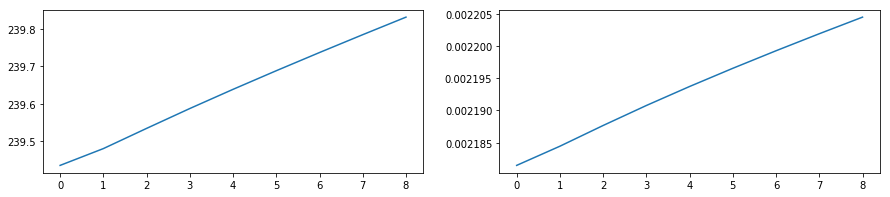

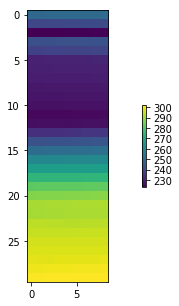

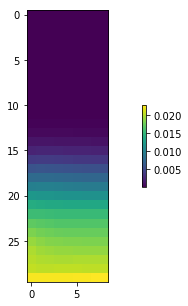

In [167]:
d17 = basics('debug17')

In [168]:
d17

<xarray.Dataset>
Dimensions:       (crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 9)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...
Dimensions w

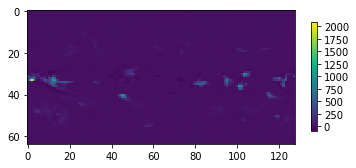

In [172]:
plt.imshow(d17['SPOST'].isel(time=1, lev=15) - d17['SPRE'].isel(time=1, lev=15)); 
plt.colorbar(shrink=0.5);

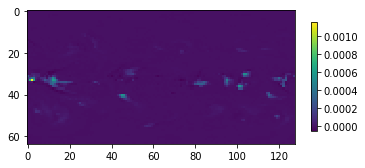

In [173]:
plt.imshow(d17['BRAINDT'].isel(time=1, lev=15)); plt.colorbar(shrink=0.5);

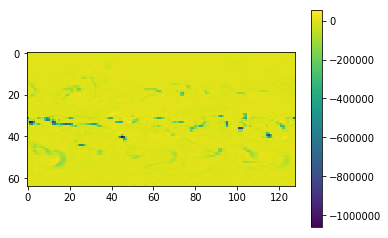

In [189]:
plt.imshow((vint(d16.isel(time=1), 'BRAINDQ', L_S)+vint(d16.isel(time=1), 'BRAINDT', C_P))*1800.);
plt.colorbar()

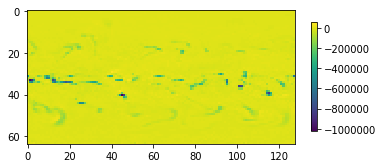

In [174]:
plt.imshow(d17['TEPOST'].isel(time=1) - d17['TEPRE'].isel(time=1)); 
plt.colorbar(shrink=0.5);

So I always forgot that I should use L_S not L_V for the total energy computation. So it is actually the energy violation of the CBRAIN, but its not very big right?

### Debug 18 - Set SPs to zero

Crash after less than a day. NAN. Still heating despite no energy change from SPs.

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


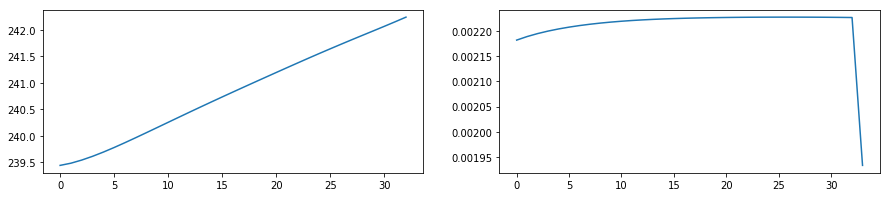

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


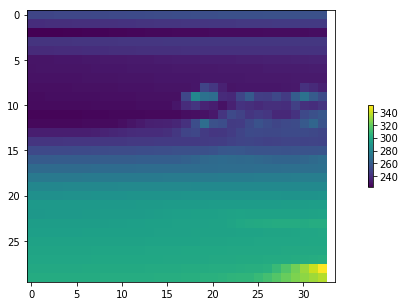

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


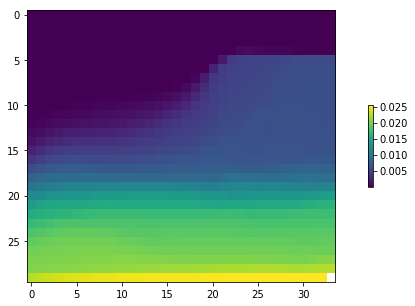

In [14]:
d18 = basics('debug18')

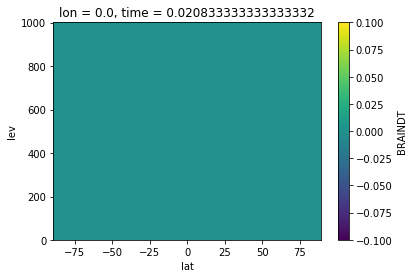

In [15]:
d18['BRAINDT'].isel(time=1, lon=0).plot()

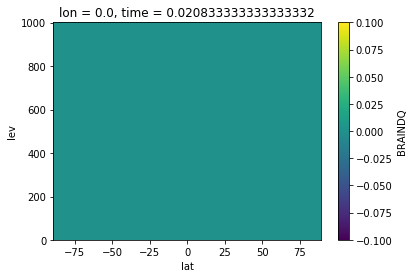

In [16]:
d18['BRAINDQ'].isel(time=1, lon=0).plot()

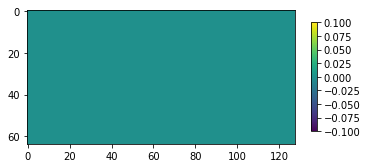

In [17]:
# So this means we now have no energy cheange from SPs, but still 
plt.imshow(d18['SPOST'].isel(time=1, lev=15) - d18['SPRE'].isel(time=1, lev=15)); 
plt.colorbar(shrink=0.5);

### Debug 19 - Set QRs to upstream value
Still increase in T..., QRs don't look too different. Energy in atmos is of course not preserved.

In [ ]:
d19 = basics('debug19')

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


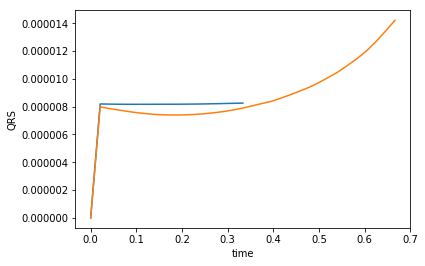

In [22]:
d19['QRS'].mean(dim=('lat', 'lon', 'lev')).plot()
d18['QRS'].mean(dim=('lat', 'lon', 'lev')).plot()

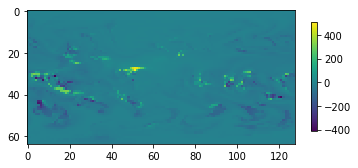

In [24]:
# Barcket around radiation
plt.imshow(d19['SPOST_R'].isel(time=1, lev=15) - d19['SPRE_R'].isel(time=1, lev=15)); 
plt.colorbar(shrink=0.5);

### Debug 20 - Check ENGYCORR

It is positive everywhere.

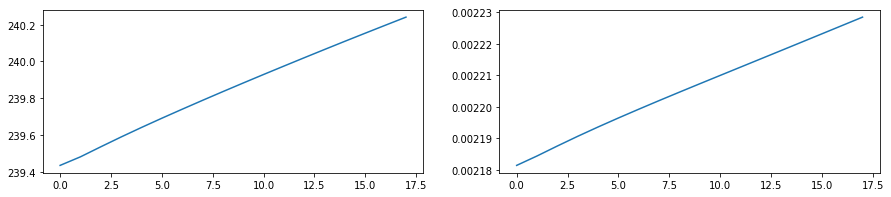

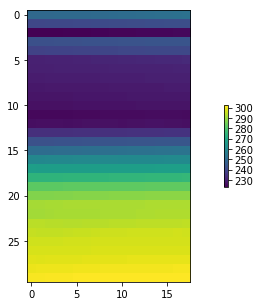

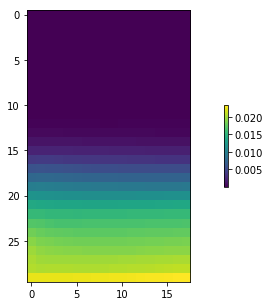

In [14]:
d20 = basics('debug20')

In [15]:
d20['ENGYCORR']

<xarray.DataArray 'ENGYCORR' (time: 18, lev: 30, lat: 64, lon: 128)>
dask.array<shape=(18, 30, 64, 128), dtype=float32, chunksize=(18, 30, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...
Attributes:
    units:        W/m2
    long_name:    Energy correction for over-all conservation
    cell_method:  time: mean

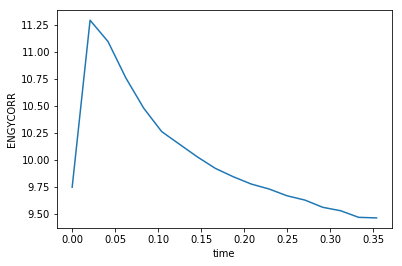

In [25]:
d20['ENGYCORR'].mean(dim=('lat', 'lon', 'lev')).plot()

### Debug 21 - Check beta, does it correlate with heating?
Around 5e-2. So totally possible

### Debug 22 - Check ENGYCORR for SP reference run

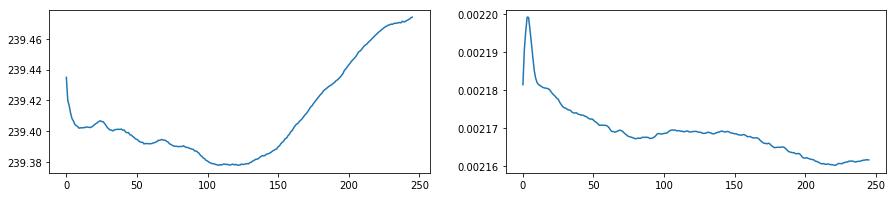

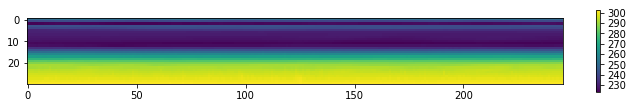

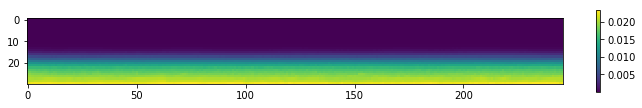

In [28]:
d22 = basics('debug22')

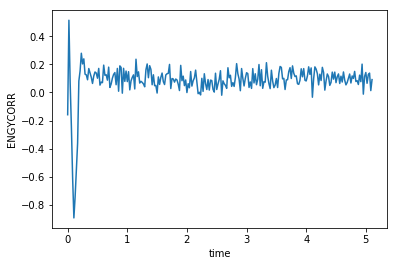

In [29]:
d22['ENGYCORR'].mean(dim=('lat', 'lon', 'lev')).plot()

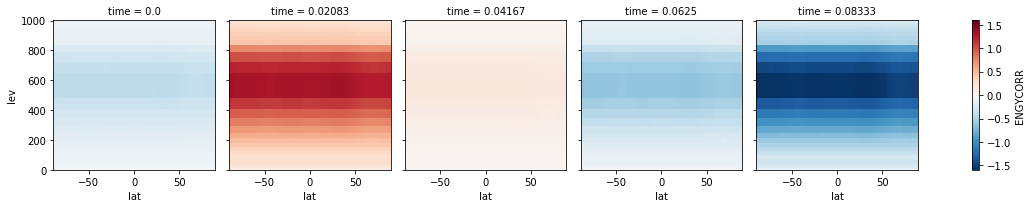

In [24]:
d22['ENGYCORR'].mean(dim='lon').plot(col='time')

### Debug 23 - More energy output, back to regular CBRAIN
TEPRE --> TEPOST --> TEPRE_R -- > TEPOST_R

 write (6,*) 'SR: BETA = ', beta   
 write (6,*) 'SR: BETA = ', residual   
 write (6,*) 'SR: BETA = ', fixmas   
 write (6,*) 'SR: BETA = ', engy1   
 write (6,*) 'SR: BETA = ', engy2   
 write (6,*) 'SR: BETA = ', difft   
 SR: BETA =   2.509269060261628E-002   
 SR: BETA =   -140.342641714679     
 SR: BETA =    1.00000213145051     
 SR: BETA =    2538149195.69687     
 SR: BETA =    2537896578.94179     
 SR: BETA =    10020.8475425550 

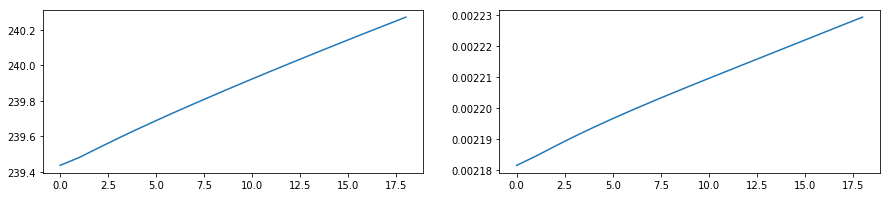

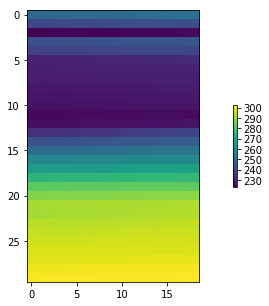

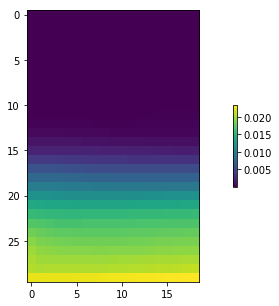

In [69]:
d23 = basics('debug23')

In [53]:
def gw_avg(ds, var):
    return (ds[var] * ds['gw']).mean(dim=('lat', 'lon'))

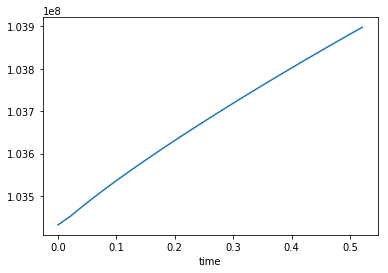

In [49]:
gw_avg(d23, 'TEPRE').plot()

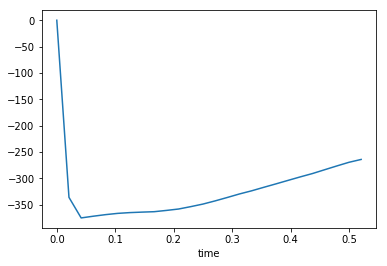

In [55]:
(gw_avg(d23, 'TEPOST') - gw_avg(d23, 'TEPRE')).plot()

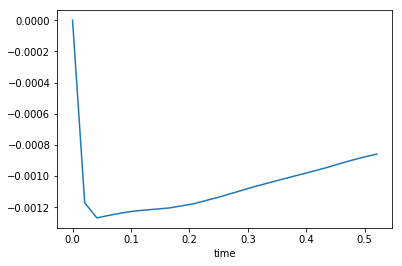

In [57]:
(gw_avg(d23, 'TWPOST') - gw_avg(d23, 'TWPRE')).plot()

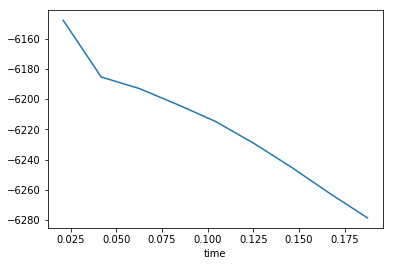

In [68]:
(gw_avg(d23, 'TEPOST_R') - gw_avg(d23, 'TEPRE_R'))[1:].plot()

### Debug 24 - SP ref with same output
 SR: BETA =   7.283486785950644E-004   
 SR: BETA =   -4.07324627690845     
 SR: BETA =   0.999999230708219     
 SR: BETA =    2521732516.78507     
 SR: BETA =    2521725184.94177     
 SR: BETA =    10019.8996478066

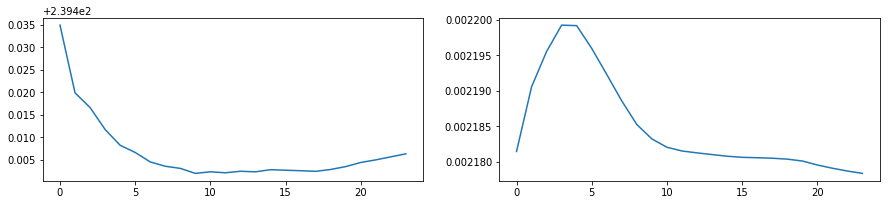

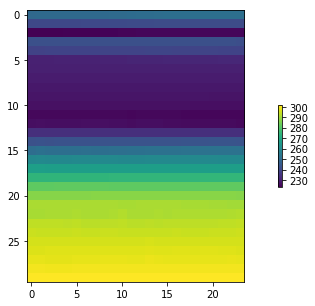

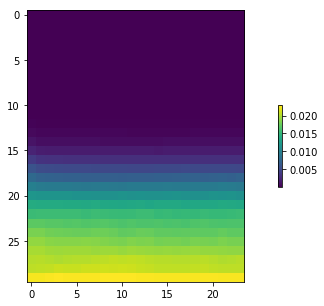

In [46]:
d24 = basics('debug24')

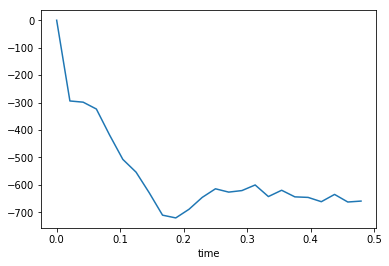

In [56]:
(gw_avg(d24, 'TEPOST') - gw_avg(d24, 'TEPRE')).plot()

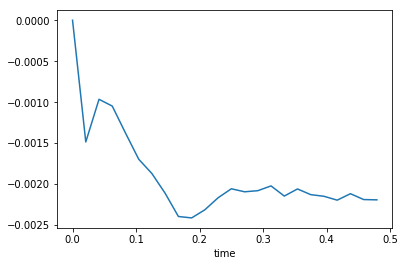

In [58]:
(gw_avg(d24, 'TWPOST') - gw_avg(d24, 'TWPRE')).plot()

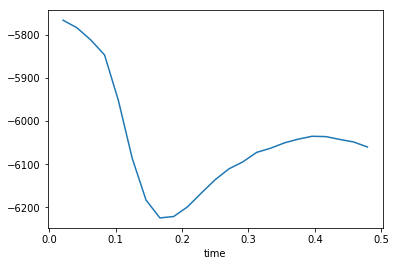

In [64]:
(gw_avg(d24, 'TEPOST_R') - gw_avg(d24, 'TEPRE_R'))[1:].plot()

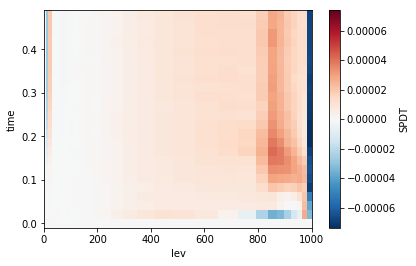

In [137]:
d24['SPDT'].mean(dim=('lon', 'lat')).plot()

### Debug 25 - Comment out beta energy correction

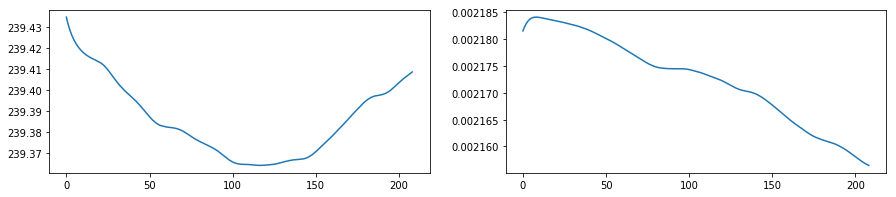

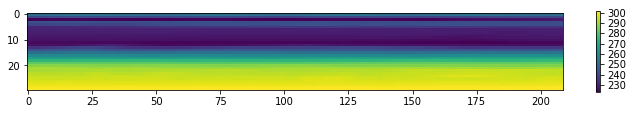

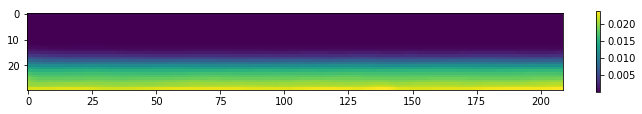

In [157]:
d25 = basics('debug25')

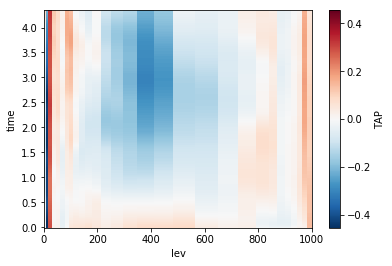

In [158]:
(d25['TAP'] - d24['TAP'].isel(time=-1)).mean(dim=('lat', 'lon')).plot()

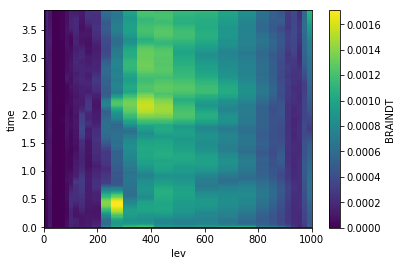

In [150]:
d25['BRAINDT'].max(dim=('lon', 'lat')).plot()

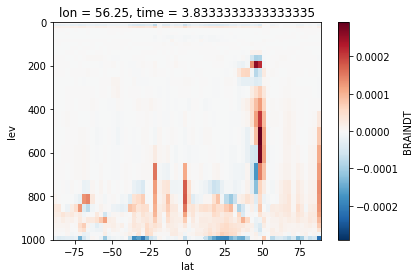

In [151]:
d25['BRAINDT'].isel(time=-1, lon=20).plot(yincrease=False)

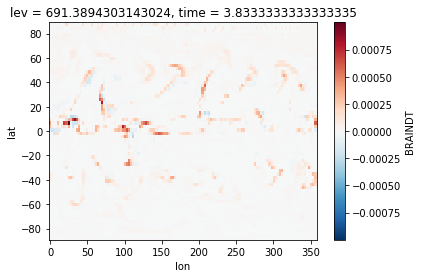

In [152]:
d25['BRAINDT'].isel(time=-1, lev=20).plot()

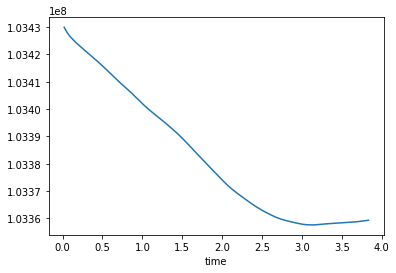

In [153]:
gw_avg(d25, 'TEPOST')[1:].plot()

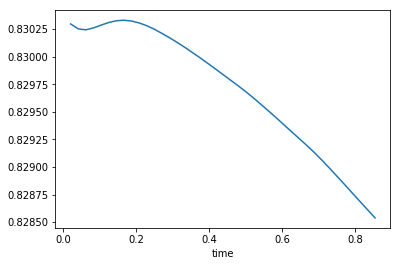

In [94]:
gw_avg(d25, 'TWPOST')[1:].plot()

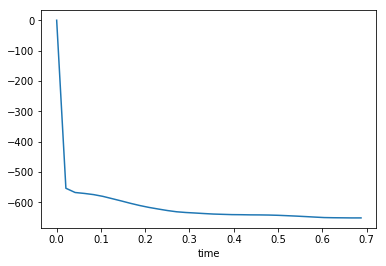

In [88]:
(gw_avg(d25, 'TEPOST') - gw_avg(d25, 'TEPRE')).plot()

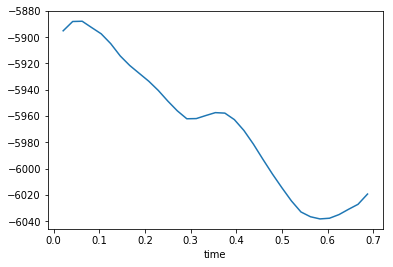

In [89]:
(gw_avg(d25, 'TEPOST_R') - gw_avg(d25, 'TEPRE_R'))[1:].plot()

# Old stuff

## The fundamental problem: Normalization

In [4]:
norm = xr.open_dataset(f'{pp_dir}purecrm_essv2_train_sample1_norm.nc'); norm

<xarray.Dataset>
Dimensions:        (feature_lev: 152, target_lev: 120)
Coordinates:
  * feature_lev    (feature_lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * target_lev     (target_lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Data variables:
    feature_means  (feature_lev) float32 ...
    feature_stds   (feature_lev) float32 ...
    feature_mins   (feature_lev) float32 ...
    feature_maxs   (feature_lev) float32 ...
    target_means   (target_lev) float32 ...
    target_stds    (target_lev) float32 ...
    target_mins    (target_lev) float32 ...
    target_maxs    (target_lev) float32 ...
    feature_names  (feature_lev) object ...
    target_names   (target_lev) object ...
Attributes:
    log:      \n    Time: 2018-02-23T13:14:25\n\n    Executed command:\n\n   ...

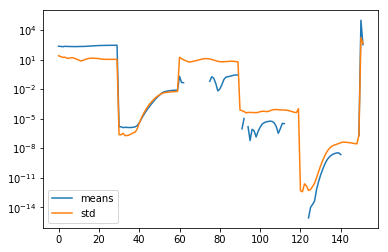

In [8]:
plt.plot(norm['feature_means'], label='means')
plt.plot(norm['feature_stds'], label='std')
plt.gca().set_yscale('log'); plt.legend();

We have wildly different input ranges. Strangely enough, some mean values seem to be zero. Let's look closer at the individual variables.

In [9]:
inps = ['TC', 'QC', 'VC', 'dTdt_adiab', 'dQdt_adiab', 'PS', 'SOLIN']
outps = ['SPDQ', 'SPDT', 'QRL', 'QRS']

In [10]:
nlev=30

TC


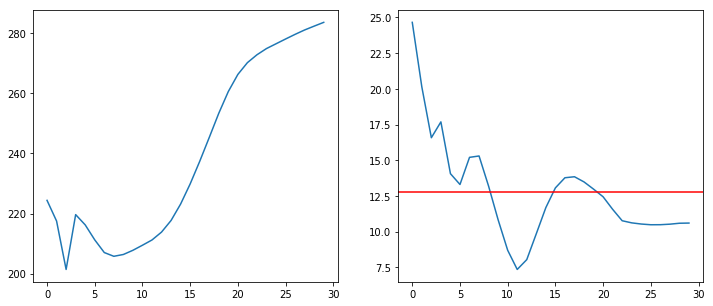

QC


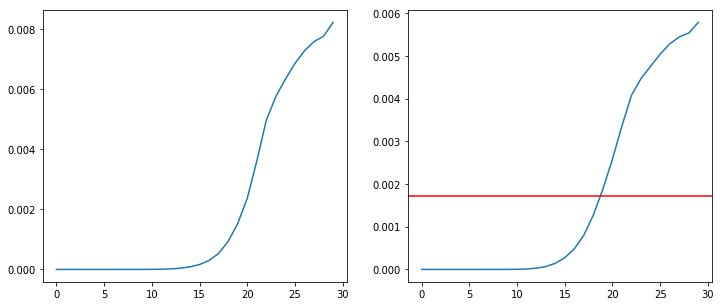

VC


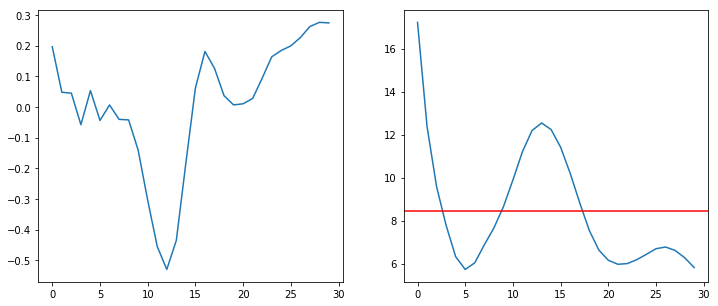

dTdt_adiab


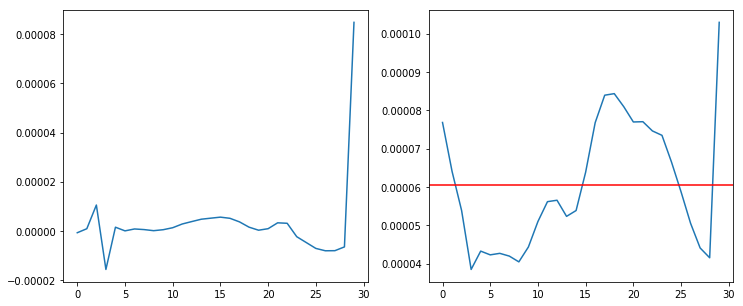

dQdt_adiab


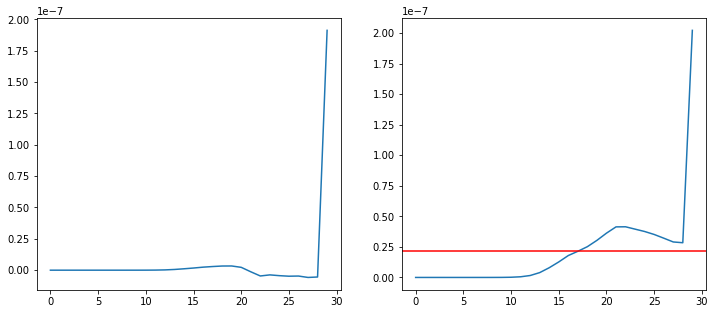

In [13]:
for i, v in enumerate(inps[:-2]):
    print(v)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(norm['feature_means'][i*nlev:(i+1)*nlev])
    axes[1].plot(norm['feature_stds'][i*nlev:(i+1)*nlev])
    axes[1].axhline(np.mean(norm['feature_stds'][i*nlev:(i+1)*nlev]), c='r')
    plt.show()

SPDQ


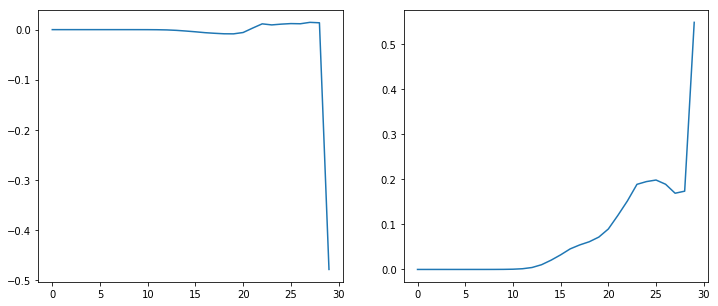

SPDT


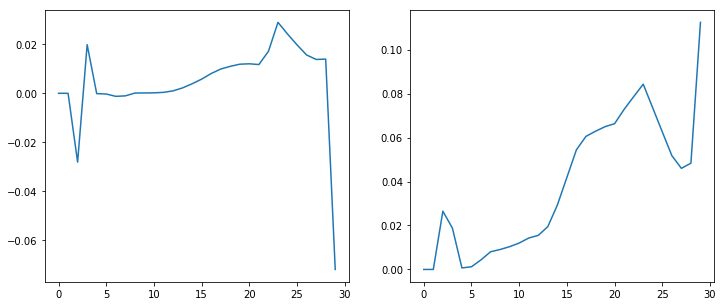

QRL


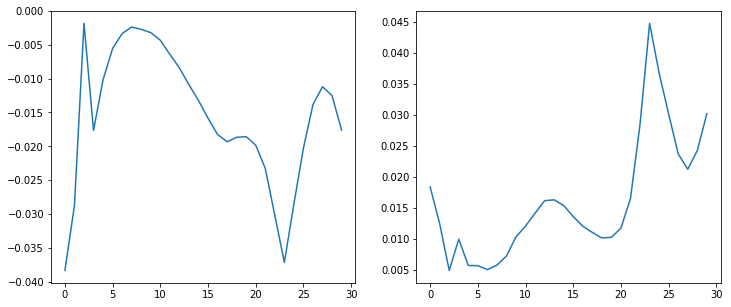

QRS


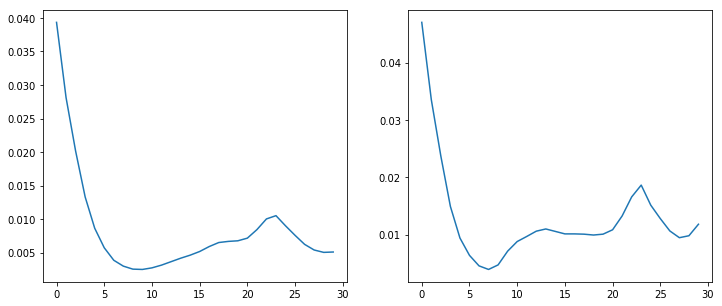

In [16]:
for i, v in enumerate(outps):
    print(v)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(norm['target_means'][i*nlev:(i+1)*nlev])
    axes[1].plot(norm['target_stds'][i*nlev:(i+1)*nlev])
    #axes[1].axhline(np.mean(norm['target_stds'][i*nlev:(i+1)*nlev]), c='r')
    plt.show()

In [14]:
test_norm = xr.open_dataset('/beegfs/DATA/pritchard/srasp/tmp/norm_by_var_test_norm.nc')

In [21]:
test_norm['feature_stds'][-2:], test_norm['feature_stds_by_var'][-2:]

(<xarray.DataArray 'feature_stds' (feature_lev: 2)>
 array([ 1711.994873,   422.95694 ], dtype=float32)
 Coordinates:
   * feature_lev  (feature_lev) int64 150 151,
 <xarray.DataArray 'feature_stds_by_var' (feature_lev: 2)>
 array([ 1711.994873,   422.95694 ], dtype=float32)
 Coordinates:
   * feature_lev  (feature_lev) int64 150 151)

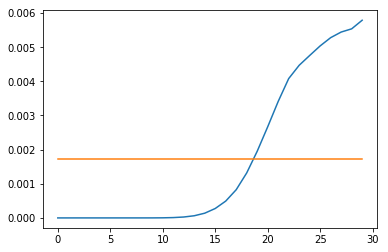

In [19]:
plt.plot(test_norm['feature_stds'][30:60])
plt.plot(test_norm['feature_stds_by_var'][30:60])

## Debug 07

Noadiab
Max RS normalization.

### Open the files

In [7]:
aquafn = '/scratch/05488/tg847872/cloudbrain_ctrl_aquaplanet_03/AndKua_aqua_SPCAM3.0_debug08*'

In [8]:
ds = xr.open_mfdataset(aquafn, decode_times=False)

In [9]:
ds

<xarray.Dataset>
Dimensions:       (crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 175)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...
Dimensions

In [35]:
mean = np.loadtxt(
    '/home1/05488/tg847872/tmp/B018_purecrm_essv2_nonorm_sample1_max_rs/inp_means.txt',
    delimiter=','
)

In [36]:
std = np.loadtxt(
    '/home1/05488/tg847872/tmp/B018_purecrm_essv2_nonorm_sample1_max_rs/inp_max_rs.txt',
    delimiter=','
)

### Why are we crashing???

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


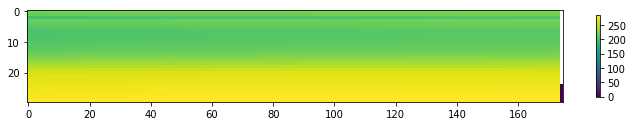

In [11]:
plot_time_lev('TAP')

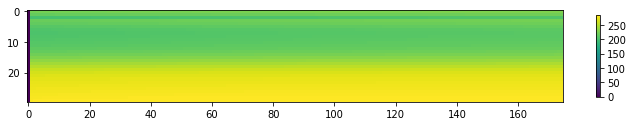

In [61]:
plot_time_lev('NNTC')

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


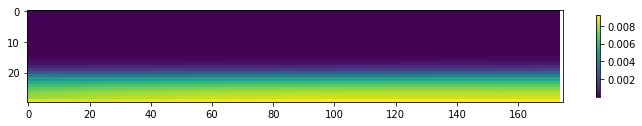

In [12]:
plot_time_lev('QAP')

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


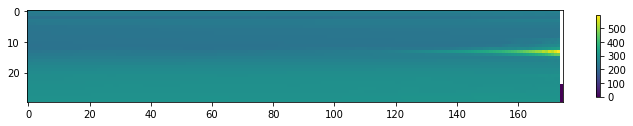

In [13]:
plot_time_lev('TAP', np.max)

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


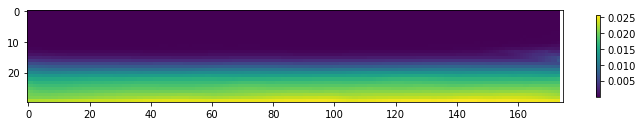

In [14]:
plot_time_lev('QAP', np.max)

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


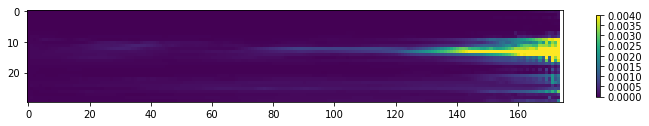

In [15]:
plot_time_lev('QRL', np.max, vmin=0, vmax=0.004)

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


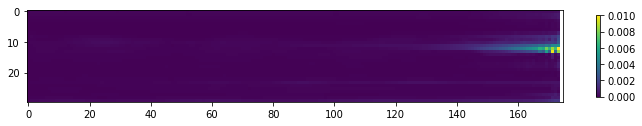

In [16]:
plot_time_lev('QRS', np.max)

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


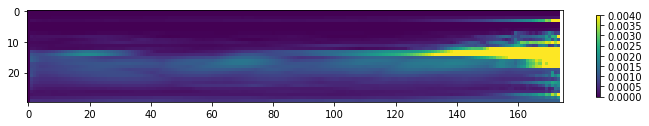

In [17]:
plot_time_lev('BRAINDT', np.max, vmin=0, vmax=0.004)

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/dask/compatibility.py:48: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


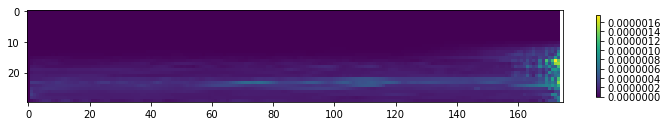

In [18]:
plot_time_lev('BRAINDQ', np.max)

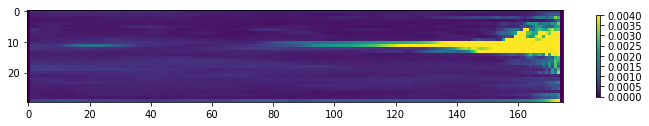

In [19]:
plot_time_lev('dTdtadia', np.max, vmax=0.004)

In [43]:
itime=120

In [20]:
def plot_lat_lon(var, itime, ilev):
    fig = plt.figure(figsize=(8, 5))
    plt.imshow(ds[var][itime, ilev])
    plt.colorbar(shrink=0.5);
    plt.show()

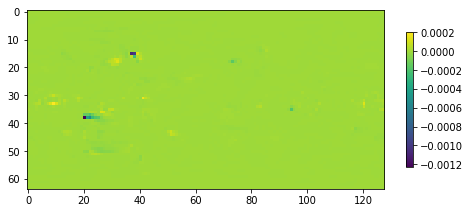

In [44]:
plot_lat_lon('BRAINDT', itime, 12)

In [45]:
def get2didxs(a, func): return(np.unravel_index(func(a), a.shape))

In [46]:
ilat, ilon = get2didxs(ds['BRAINDT'][itime, 12].data, np.argmin)

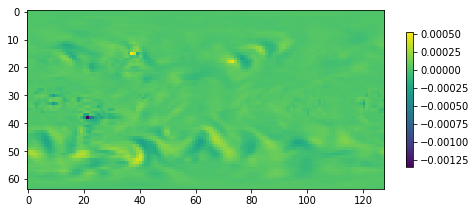

In [47]:
plot_lat_lon('dTdtadia', itime, 12)

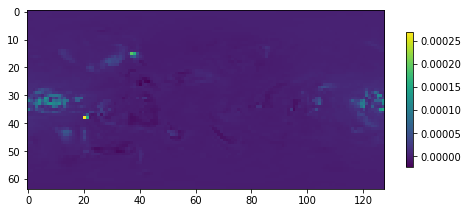

In [48]:
plot_lat_lon('QRS', itime, 12)

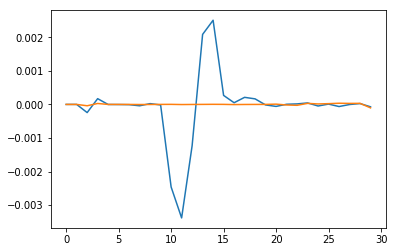

In [49]:
plt.plot(ds['BRAINDT'][itime, :, ilat, ilon])
plt.plot(ds['BRAINDT'][itime, :, ilat+3, ilon])

In [50]:
def normalize(x):
    return (x - mean[:, None, None]) / std[:, None, None]

In [53]:
inps_norm = get_cb_inps(itime)

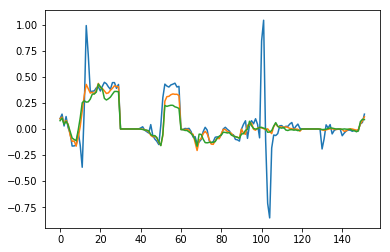

In [54]:
plt.plot(inps_norm[:, ilat, ilon])
plt.plot(inps_norm[:, ilat+1, ilon])
plt.plot(inps_norm[:, ilat+2, ilon])

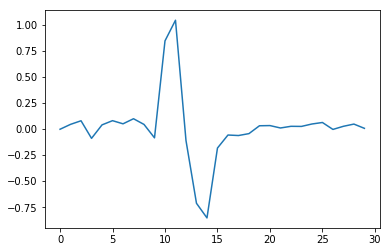

In [56]:
# dTdt_adiabtic
plt.plot(inps_norm[90:120, ilat, ilon])

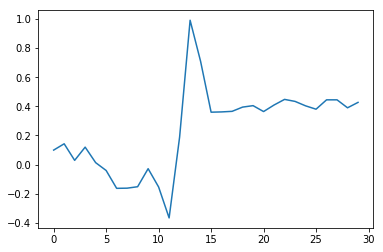

In [57]:
# T
plt.plot(inps_norm[:30, ilat, ilon])

In [66]:
ilat, ilon

(38, 20)

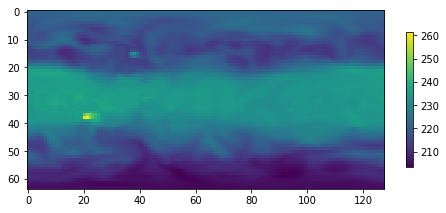

In [64]:
plot_lat_lon('TAP', itime, 13)

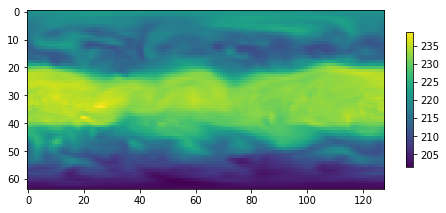

In [70]:
plot_lat_lon('TAP', 70, 13)

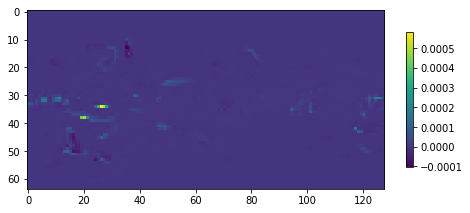

In [71]:
plot_lat_lon('BRAINDT', 70, 13)

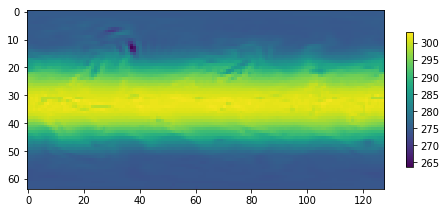

In [148]:
plot_lat_lon('TAP', 70, -1)

In [116]:
def stack_outps(itime):
    x = np.concatenate(
        [ds['BRAINDQ'][itime]*L_V, ds['BRAINDT'][itime]*C_P, 
         ds['QRS'][itime]*C_P, ds['QRL'][itime]*C_P])
    return x

In [140]:
itime =30

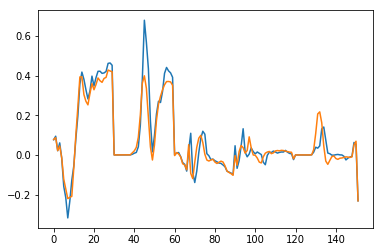

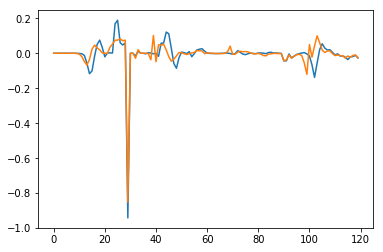

In [141]:
inps_norm = get_cb_inps(itime)
outps_norm = stack_outps(itime)
plt.plot(inps_norm[:, ilat, ilon])
plt.plot(inps_norm[:, ilat+1, ilon])
plt.show()
plt.plot(outps_norm[:, ilat, ilon])
plt.plot(outps_norm[:, ilat+1, ilon])
plt.show()

In [119]:
# BRAINDT and QRL get really messed up, and it seems to be because of Q and Qadiab

In [143]:
# Is the mean state somehow very different?
ref = xr.open_dataset(
    '/home1/05488/tg847872/tmp/AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-02-00000.nc',
    decode_times=False
)

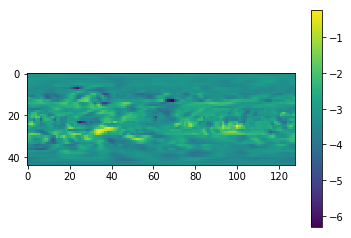

In [151]:
plt.imshow(ref['TAP'][70-48,13]-ds['TAP'][70, 13]);plt.colorbar()

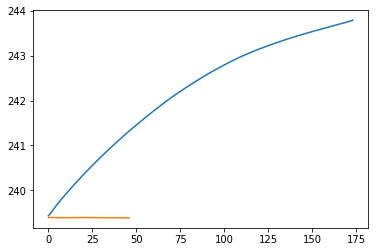

In [161]:
plt.plot(np.mean(ds['TAP'][:-1], axis=(1,2,3)))
plt.plot(np.mean(ref['TAP'][:-1], axis=(1,2,3)))

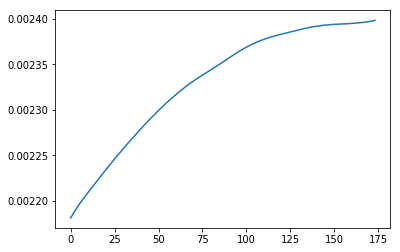

In [154]:
plt.plot(np.mean(ds['QAP'][:-1], axis=(1,2,3)))

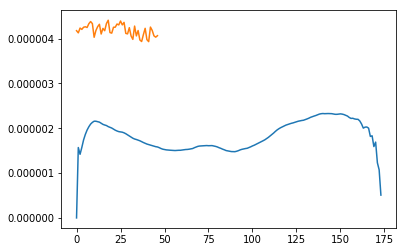

In [156]:
plt.plot(np.mean(ds['BRAINDT'][:-1], axis=(1,2,3)))
plt.plot(np.mean(ref['SPDT'][:-1], axis=(1,2,3)))

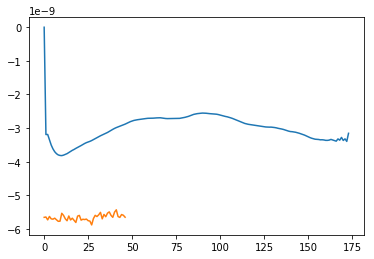

In [157]:
plt.plot(np.mean(ds['BRAINDQ'][:-1], axis=(1,2,3)))
plt.plot(np.mean(ref['SPDQ'][:-1], axis=(1,2,3)))

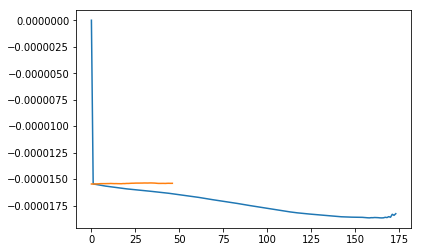

In [159]:
plt.plot(np.mean(ds['QRL'][:-1], axis=(1,2,3)))
plt.plot(np.mean(ref['QRL'][:-1], axis=(1,2,3)))

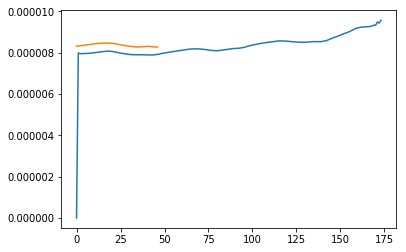

In [160]:
plt.plot(np.mean(ds['QRS'][:-1], axis=(1,2,3)))
plt.plot(np.mean(ref['QRS'][:-1], axis=(1,2,3)))

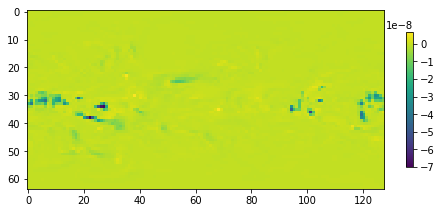

In [100]:
plot_lat_lon('BRAINDQ', 90, 13)

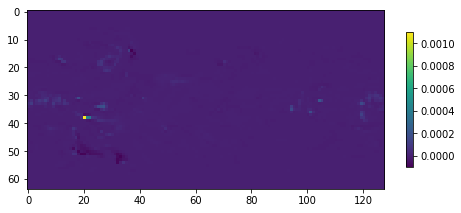

In [101]:
plot_lat_lon('BRAINDT', 90, 13)

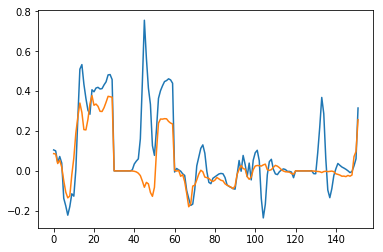

In [92]:
inps_norm = get_cb_inps(70)
plt.plot(inps_norm[:, ilat, ilon])
plt.plot(inps_norm[:, ilat+2, ilon])

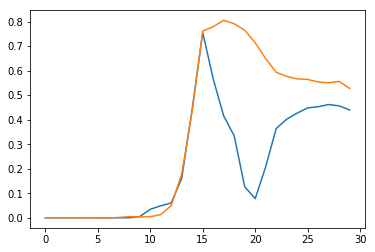

In [93]:
# Q
plt.plot(inps_norm[30:60, ilat, ilon])
plt.plot(inps_norm[30:60, 32, 5])

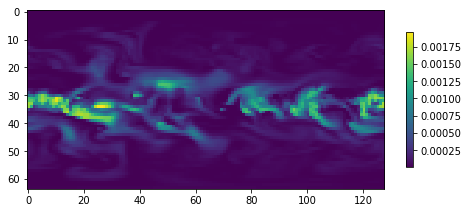

In [94]:
plot_lat_lon('NNQC', 70, 15)

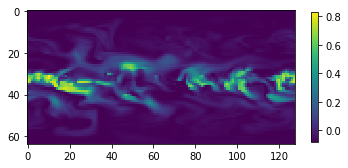

In [85]:
plt.imshow(inps_norm[30+15]); plt.colorbar(shrink=0.6);

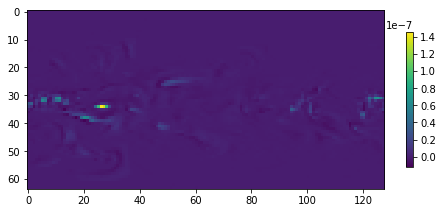

In [95]:
plot_lat_lon('dQdtadia', 70, 13)

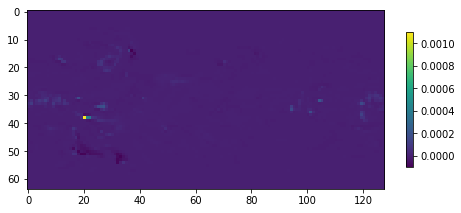

In [97]:
plot_lat_lon('BRAINDT', 90, 13)

In [10]:
ds['TAP'].shape

(260, 30, 64, 128)

In [12]:
anim = animate_lat_lon(ds, 'TAP', 20)

It happens at a few spots. Where?

In [46]:
ilat, ilon = get2didxs(ds['QAP'][-2, 27].data, np.argmax)

In [47]:
ilat, ilon

(39, 45)

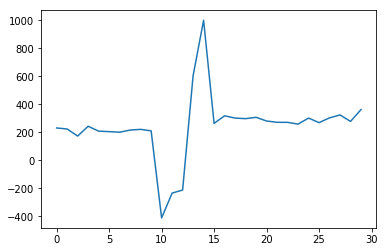

In [31]:
plt.plot(ds['TAP'][-2, :, 30, 103])


### What causes the weirdness - Check CBRAIN outputs

In [13]:
HTML(animate_lat_lon(ds, 'BRAINDT', 16).to_html5_video())

ValueError: Invalid file object: <_io.BufferedReader name=53>

In [34]:
HTML(animate_lat_lon('BRAINDQ', 13).to_html5_video())

In [231]:
HTML(animate_lat_lon(ds, 'QRS', 12, vmin=0, vmax=0.0001).to_html5_video())

In [232]:
HTML(animate_lat_lon(ctrl_ds.isel(time=range(48)), 'QRS', 12, vmin=0, vmax=0.0001).to_html5_video())

Is it really only level 12 of QRS???

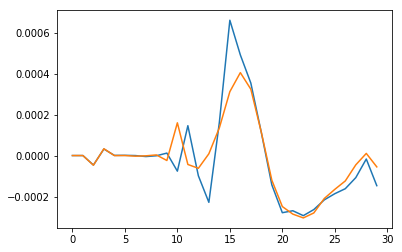

In [238]:
plt.plot(ds['BRAINDT'][20, :, ilat, ilon])
plt.plot(ctrl_ds['SPDT'][20, :, ilat, ilon])

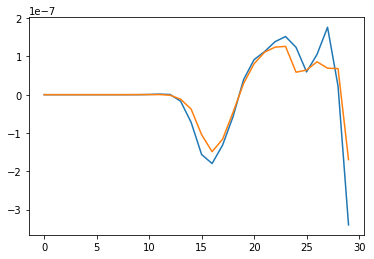

In [236]:
plt.plot(ds['BRAINDQ'][20, :, ilat, ilon])
plt.plot(ctrl_ds['SPDQ'][20, :, ilat, ilon])

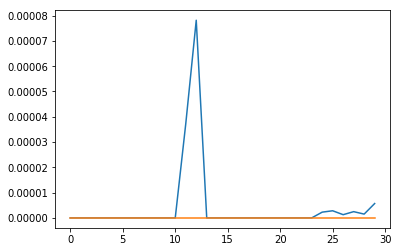

In [234]:
plt.plot(ds['QRS'][20, :, ilat, ilon])
plt.plot(ctrl_ds['QRS'][20, :, ilat, ilon])

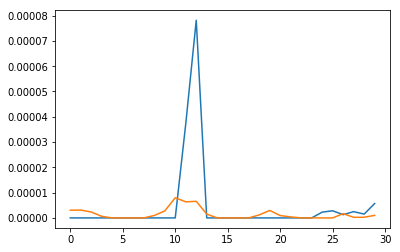

In [243]:
# A few pixels next to the point...
plt.plot(ds['QRS'][20, :, ilat, ilon])
plt.plot(ds['QRS'][20, :, ilat-2, ilon])


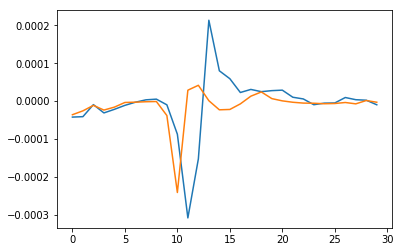

In [235]:
plt.plot(ds['QRL'][20, :, ilat, ilon])
plt.plot(ctrl_ds['QRL'][20, :, ilat, ilon])

### Why are the brain predictions SO BAD

In [ ]:
inps_norm.shape

In [98]:
def animate_line(a, ilat, ilon, interval=100, ylim=None, **kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(a.shape[1])
    I, = ax.plot(x, a[1, :, ilat, ilon], **kwargs)
    if ylim is None:
        ylim = (-np.std(a[:, :, ilat, ilon]), np.std(a[:, :, ilat, ilon]))
    ax.set_ylim(ylim)
    ax.set_title(f'Step 1')
    def update(i):
        ax.set_title(f'Step {i}')
        I.set_data(x, a[i, :, ilat, ilon])
        return (I,)
    plt.close(fig)
    return FuncAnimation(fig, update, frames=np.arange(1, ds.time.size), interval=interval)

In [141]:
HTML(animate_line(inps_norm, ilat, ilon, ylim=(-20, 20)).to_html5_video())

In [99]:
inps_norm = get_cb_inps_noadiab(25)

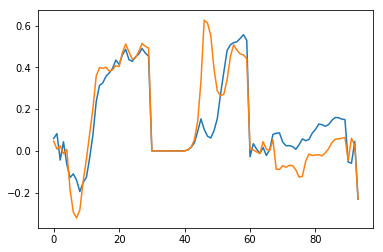

In [100]:
plt.plot(inps_norm[:, ilat, ilon])
plt.plot(inps_norm[:, ilat-10, ilon])

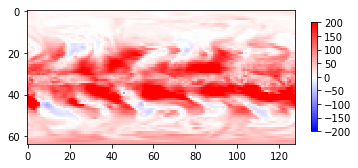

In [95]:
plt.imshow(ds['LHFLX'][25], vmin=-200, vmax=200, cmap='bwr'); plt.colorbar(shrink=0.5)

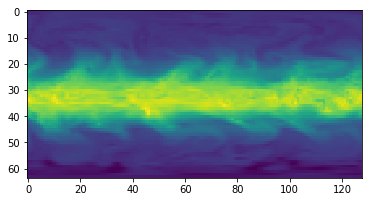

In [102]:
plt.imshow(ds['QAP'][25, -1])

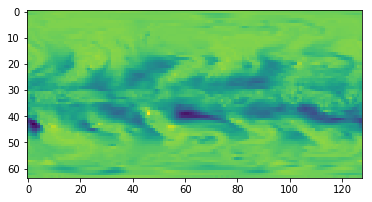

In [98]:
plt.imshow(ds['BRAINDQ'][25, -1])

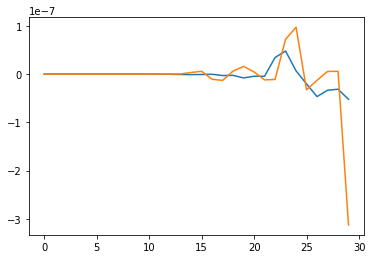

In [101]:
plt.plot(ds['BRAINDQ'][25, :, ilat, ilon])
plt.plot(ds['BRAINDQ'][25, :, ilat-10, ilon])

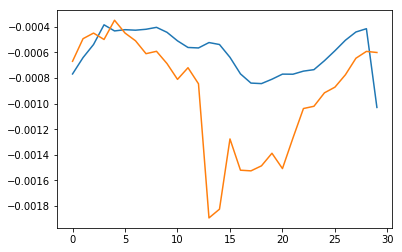

In [259]:
plt.plot(-10*norm['feature_stds'][90:120])
plt.plot(norm['feature_mins'][90:120])

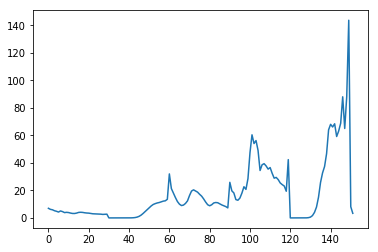

In [260]:
plt.plot((norm['feature_maxs'] - norm['feature_mins'])/norm['feature_stds_by_var'])

In [113]:
HTML(animate_line(inps_norm[:, 90:120], ilat, ilon, ylim=(-20, 20)).to_html5_video())
#dTdt_adiabatic? Why is is so large?

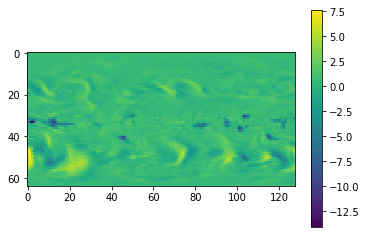

In [145]:
plt.imshow(inps_norm[1, 90+16, :, :])
plt.colorbar();

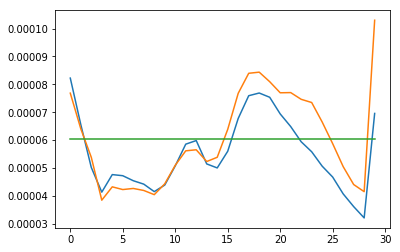

In [149]:
plt.plot(np.std(ds['dTdtadia'][1], axis=(1,2)))
plt.plot(norm['feature_stds'][90:120])
plt.plot(norm['feature_stds_by_var'][90:120])

In [196]:
# Load ctrl
ctrl_ds = xr.open_mfdataset(
    '/home1/05488/tg847872/tmp/AndKua_aqua_SPCAM3.0_enhance05.cam2.h1.0000-01-0*-00000.nc',
decode_times=False)

In [198]:
dt = 1800.

In [218]:
def get_dt_from_raw(a):
    TC = a['TAP'].values[:-1] - a['DTV'][:-1].values * dt
    TBP = a['TAP'][1:].values - a['TPHYSTND'][1:].values * dt
    return (TBP - TC) / dt

In [219]:
ctrl_dTdt = get_dt_from_raw(ctrl_ds)

In [229]:
HTML(animate_lat_lon(ctrl_dTdt, 'dTdtadia', 16, vmin=-0.0004, vmax=0.0004).to_html5_video())

In [164]:
HTML(animate_lat_lon(ds, 'dTdtadia', 16, vmin=-0.0004, vmax=0.0004).to_html5_video())

In [231]:
HTML(animate_lat_lon(ds, 'QRS', 12, vmin=0, vmax=0.0001).to_html5_video())

In [207]:
tmp2 = xr.Dataset({'dTdtadia': get_dt_from_raw(ds)})

In [208]:
HTML(animate_lat_lon(tmp2, 'dTdtadia', 16, vmin=-0.0004, vmax=0.0004).to_html5_video())

In [209]:
t = 1
dt=1800.

In [213]:
TC = ds['TAP'][t-1] - ds['DTV'][t-1]*dt
TBP = ds['TAP'][t] - ds['TPHYSTND'][t]*dt

In [214]:
dT_tmp = (TBP - TC)/dt

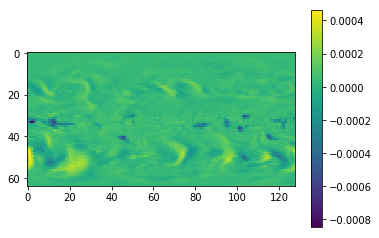

In [215]:
plt.imshow(dT_tmp[16]); plt.colorbar();

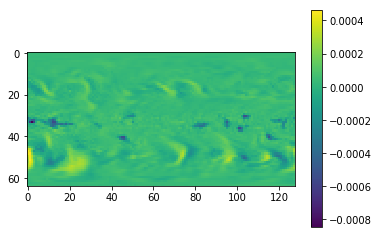

In [216]:
plt.imshow(ds['dTdtadia'][1, 16]); plt.colorbar()

In [246]:
from preprocess_aqua import compute_adiabatic

In [247]:
test = compute_adiabatic(ds, 'TAP')

In [248]:
test

<xarray.DataArray (time: 139, lev: 30, lat: 64, lon: 128)>
dask.array<shape=(139, 30, 64, 128), dtype=float32, chunksize=(47, 30, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...

In [249]:
ds['dTdtadia']

<xarray.DataArray 'dTdtadia' (time: 140, lev: 30, lat: 64, lon: 128)>
dask.array<shape=(140, 30, 64, 128), dtype=float32, chunksize=(48, 30, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...
Attributes:
    units:        K/s
    long_name:    Internally estimated adiabatic T tendency entering net
    cell_method:  time: mean

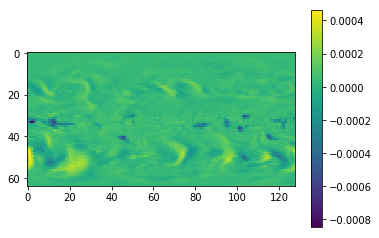

In [255]:
plt.imshow(test[0, 16]); plt.colorbar()

In [251]:
np.allclose(test[0, 16], ds['dTdtadia'][1, 16])

False

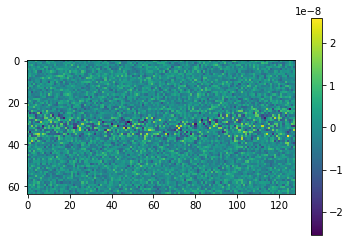

In [254]:
plt.imshow(test[10, 16] - ds['dTdtadia'][11, 16]); plt.colorbar()

In [118]:
# There are these persistent spots of high dTdt values, are they much larger that normal?
norm['feature_mins'][90+15]

<xarray.DataArray 'feature_mins' ()>
array(-0.001276, dtype=float32)
Coordinates:
    feature_lev  int64 105

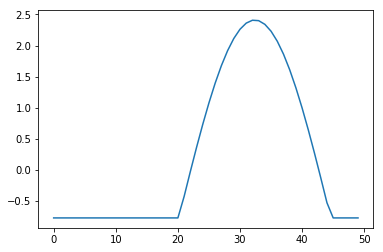

In [110]:
plt.plot(inps_norm[1:, -1, ilat, ilon])

In [ ]:
HTML(animate_line(inps_norm, ilat, ilon).to_html5_video())

In [101]:
HTML(animate_line(ds['BRAINDT'], ilat, ilon).to_html5_video())

In [94]:
HTML(animate_line(ds['BRAINDQ'], ilat, ilon).to_html5_video())

In [102]:
HTML(animate_line(ds['QRS'], ilat, ilon, ylim=(0, 0.00008)).to_html5_video())

In [96]:
HTML(animate_line(ds['QRL'], ilat, ilon).to_html5_video())

So this time its dTdt where the problem is. So I guess we will also limit SPDT up there.

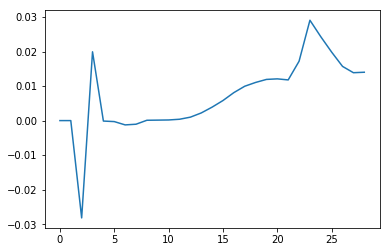

In [99]:
plt.plot(norm['target_means'][1*30:2*30-1])

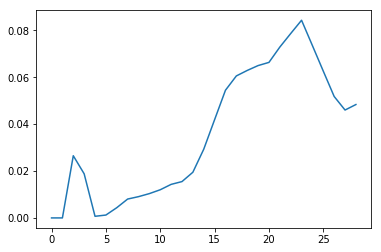

In [68]:
plt.plot(norm['target_stds'][1*30:2*30-1])

But the target std suggests that SPDT is definitely happening up there.

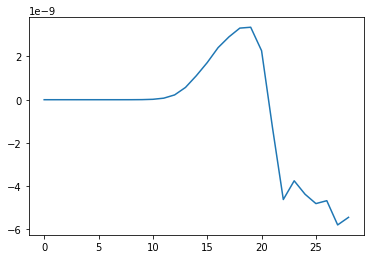

In [100]:
plt.plot(norm['feature_means'][4*30:5*30-1])

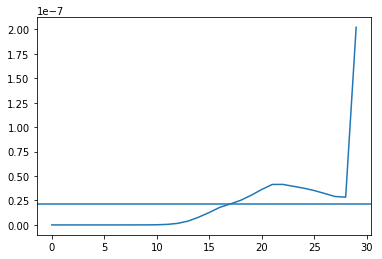

In [105]:
plt.plot(norm['feature_stds'][4*30:5*30])
plt.axhline(norm['feature_stds'][4*30:5*30].mean())

The problem is that the noise prodictions get advected and cause really large values. Trncating SPD* from lvls 1-9 did not work because the problem persists in the layers below. So would a better way be to clip the NN input values to ensure they never cause crazy predictions?

# Old stuff

In [13]:
ds['BRAINDT']

<class 'netCDF4._netCDF4.Variable'>
float32 BRAINDT(time, lev, lat, lon)
    units: K/s
    long_name: T tendency - Gentine-Pritchard neural net for moist convection
    cell_method: time: mean
unlimited dimensions: time
current shape = (48, 30, 64, 128)
filling off

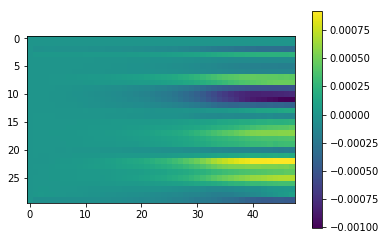

In [14]:
plt.imshow(np.mean(ds['BRAINDT'], axis=(2, 3)).T)
plt.colorbar();

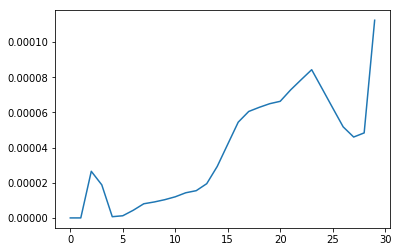

In [20]:
plt.plot(norm['target_stds'][30:60] / C_P)
plt.plot(norm['target_maxs'][30:60] / C_P)

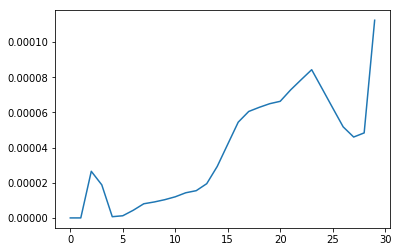

In [20]:
plt.plot(norm['target_stds'][30:60] / C_P)
plt.plot(norm['target_maxs'][30:60] / C_P)

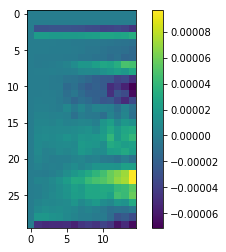

In [39]:
plt.imshow(np.mean(ds['BRAINDT'][:15], axis=(2, 3)).T)
plt.colorbar();

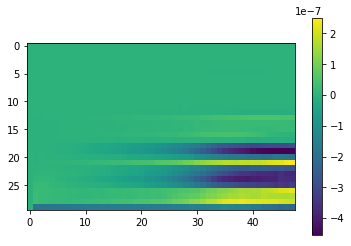

In [8]:
plt.imshow(np.mean(ds['BRAINDQ'], axis=(2, 3)).T)
plt.colorbar();

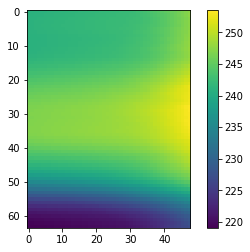

In [9]:
plt.imshow(np.mean(ds['TAP'], axis=(1, 3)).T)
plt.colorbar();

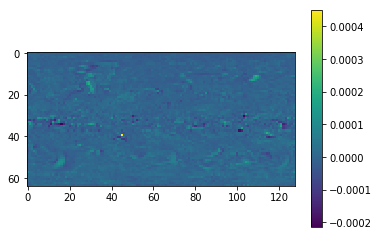

In [10]:
plt.imshow(ds['BRAINDT'][1, 25])
plt.colorbar();

## Crash debug and NN tests

In [8]:
inps = ['TC', 'QC', 'VC', 'dTdt_adiab', 'dQdt_adiab', 'PS', 'SOLIN']
outps = ['SPDQ', 'SPDT', 'QRL', 'QRS']

In [9]:
dt = 1800.
t = 3

In [10]:
TC = ds['TAP'][t-1] - ds['DTV'][t-1] * dt
QC = ds['QAP'][t-1] - ds['VD01'][t-1] * dt
VC = ds['VAP'][t-1]

In [11]:
TC.shape

(30, 64, 128)

In [12]:
TBP = ds['TAP'][t] - ds['TPHYSTND'][t] * dt
QBP = ds['QAP'][t] - ds['PHQ'][t] * dt

In [13]:
dTdt_adiab = (TBP - TC) / dt
dQdt_adiab = (QBP - QC) / dt

In [14]:
PS = ds['NNPS'][t]
SOLIN = ds['NNSOLIN'][t]

In [15]:
PS = np.expand_dims(PS, 0); PS.shape

(1, 64, 128)

In [16]:
SOLIN = np.expand_dims(SOLIN, 0)

In [17]:
inp_arr_raw = np.concatenate([TC, QC, VC, dTdt_adiab, dQdt_adiab, PS, SOLIN]); inp_arr_raw.shape

(152, 64, 128)

In [18]:
def normalize(x):
    return (x - mean[:, None, None]) / std[:, None, None]

In [19]:
inp_arr_cb = np.concatenate(
    [ds['NNTC'][t], ds['NNQC'][t], ds['NNVC'][t], ds['dTdtadia'][t], ds['dQdtadia'][t],
     np.expand_dims(ds['NNPS'][t], 0), np.expand_dims(ds['NNSOLIN'][t], 0)]
); inp_arr_cb.shape

(152, 64, 128)

In [20]:
np.allclose(inp_arr_cb, inp_arr_raw)

False

In [21]:
inp_raw_norm = normalize(inp_arr_raw)
inp_cb_norm = normalize(inp_arr_cb)

In [53]:
def get_cb_inps(t, norm=True):
    x = np.concatenate(
        [ds['NNTC'][t], ds['NNQC'][t], ds['NNVC'][t], ds['dTdtadia'][t], ds['dQdtadia'][t],
         np.expand_dims(ds['NNPS'][t], 0), np.expand_dims(ds['NNSOLIN'][t], 0)]
    )
    return normalize(x) if norm else x

In [22]:
ilat = 33; ilon = 0

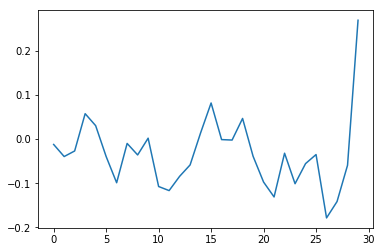

In [23]:
plt.plot(ds['BRAINDT'][3,:,ilat,ilon])

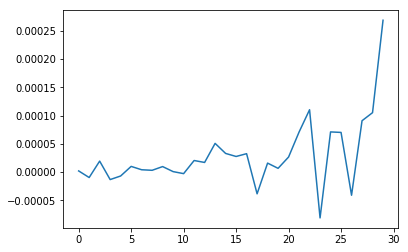

In [24]:
plt.plot(ds['BRAINDQ'][3,:,ilat,ilon])

## Get predictions

In [26]:
m = keras.models.load_model('/home1/05488/tg847872/tmp/B001_purecrm_ess_sample1_base.h5')

In [27]:
inp_cb_norm.shape

(152, 64, 128)

In [28]:
preds = m.predict(inp_cb_norm.reshape(152, -1).T); preds.shape

(8192, 120)

In [29]:
preds = preds.T.reshape(120, 64, 128)

In [73]:
def get_cb_preds(t):
    cb_preds = np.concatenate(
        [ds['BRAINDQ'][t] * L_V, ds['BRAINDT'][t]* C_P, ds['QRL'][t] * C_P, ds['QRS'][t] * C_P]
    )
    return cb_preds

In [30]:
cb_preds = np.concatenate(
    [ds['BRAINDQ'][t] * L_V, ds['BRAINDT'][t]* C_P, ds['QRL'][t] * C_P, ds['QRS'][t] * C_P]
); cb_preds.shape

(120, 64, 128)

In [31]:
# BRAINDQ = ptend%q = SPDQ(output)
# SPDQ(output) = NNoutput / LV
# BRAINDT = (ptend%S = SPDT(output)) / CP
# SPDT(output) = NNoutput

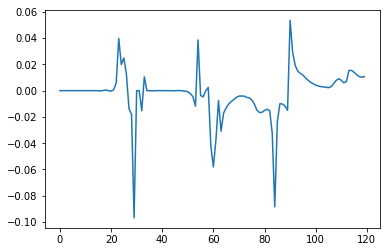

In [34]:
plt.plot(cb_preds[:, 0, 0])

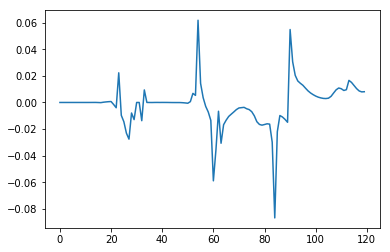

In [35]:
plt.plot(preds[:, 0, 0])

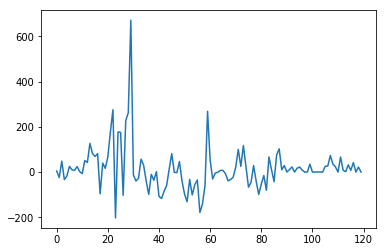

In [37]:
plt.plot(cb_preds[:, 33, 0]-preds[:, 33, 0])

In [200]:
ds['BRAINDQ']

<class 'netCDF4._netCDF4.Variable'>
float32 BRAINDQ(time, lev, lat, lon)
    units: kg/kg/s
    long_name: Q tendency - neural net for moist convection
    cell_method: time: mean
unlimited dimensions: time
current shape = (4, 30, 64, 128)
filling off

## Reproduce F90 vectors

In [38]:
search_val = 246.518145771772

In [59]:
inps_t1_raw = get_cb_inps(1, False)

In [60]:
a = np.abs(inps_t1_raw - search_val); a.shape

(152, 64, 128)

In [61]:
np.unravel_index(a.argmin(), a.shape)

(0, 0, 0)

In [62]:
inps_t1_raw[:, 0, 0]

array([ 2.4651814e+02,  2.3189018e+02,  2.1640247e+02,  2.3891216e+02,
        2.3194446e+02,  2.2959180e+02,  2.2944063e+02,  2.2874290e+02,
        2.2771008e+02,  2.2672400e+02,  2.2561212e+02,  2.2314035e+02,
        2.2125610e+02,  2.1830640e+02,  2.1714983e+02,  2.1836169e+02,
        2.2343808e+02,  2.3032021e+02,  2.3893547e+02,  2.4766966e+02,
        2.5389316e+02,  2.5808481e+02,  2.6173392e+02,  2.6425168e+02,
        2.6555685e+02,  2.6738092e+02,  2.6912375e+02,  2.7075772e+02,
        2.7226547e+02,  2.7362326e+02,  1.9037142e-06,  1.8891703e-06,
        1.7588474e-06,  1.7571419e-06,  1.7425954e-06,  1.6574567e-06,
        1.5940446e-06,  1.5920792e-06,  1.5923852e-06,  1.5992169e-06,
        1.6423849e-06,  1.7181877e-06,  2.1865117e-06,  4.1795220e-06,
        7.7228233e-06,  1.6083559e-05,  3.4336816e-05,  7.8597659e-05,
        2.4581162e-04,  5.1884243e-04,  8.2231179e-04,  1.1295289e-03,
        1.4988487e-03,  1.9153649e-03,  2.2750068e-03,  2.4801614e-03,
      

In [63]:
inps_t1_norm = get_cb_inps(1, True)

In [64]:
inps_t1_norm[:, 0, 0]

array([ 8.94153581e-01,  7.07858112e-01,  8.94260659e-01,  1.08749873e+00,
        1.11231759e+00,  1.37628314e+00,  1.47046584e+00,  1.49369949e+00,
        1.60869529e+00,  1.74392010e+00,  1.85987739e+00,  1.63947883e+00,
        9.41156410e-01,  8.47009521e-02, -4.86854805e-01, -8.53299017e-01,
       -9.91211354e-01, -1.06967220e+00, -1.06674921e+00, -1.00083740e+00,
       -1.00658204e+00, -1.05974458e+00, -1.03671283e+00, -1.00560546e+00,
       -1.04085340e+00, -1.02425766e+00, -1.00652098e+00, -9.87644488e-01,
       -9.60186400e-01, -9.49304483e-01,  1.59571251e+00,  1.72462031e+00,
        1.63699311e+00,  2.29418472e+00,  2.39237293e+00,  1.91740094e+00,
        1.25203412e+00,  7.47027224e-01,  2.60289519e-01, -4.04909216e-01,
       -6.05848793e-01, -6.36221750e-01, -6.11097726e-01, -5.71069410e-01,
       -5.49099813e-01, -5.38849585e-01, -5.49967062e-01, -5.67327831e-01,
       -5.37167798e-01, -5.36287141e-01, -6.03172823e-01, -7.41146176e-01,
       -8.52737668e-01, -

In [65]:
w = m.get_weights()

In [68]:
len(w), w[0].shape

(4, (152, 512))

In [69]:
w[0]

array([[ 0.08302586,  0.02850876,  0.07611392, ..., -0.04379965,
         0.04357586,  0.09792221],
       [ 0.03718822, -0.03001069,  0.05664457, ...,  0.05236302,
        -0.00342062,  0.0172641 ],
       [ 0.04920626,  0.03305241,  0.04127048, ..., -0.00547866,
         0.03435544,  0.03742914],
       ...,
       [ 0.02212742,  0.00229083,  0.00602679, ...,  0.03932348,
         0.04095541,  0.03244013],
       [ 0.04493503,  0.01651884,  0.06989796, ...,  0.07412373,
         0.06511395,  0.05881803],
       [ 0.02896229,  0.00742906,  0.03047865, ...,  0.02422526,
         0.04262394,  0.03720357]], dtype=float32)

In [70]:
w[1].shape, w[1]

((512,), array([-1.1471430e+00, -5.5024886e-01, -1.1187141e+00, -1.0000501e+00,
        -9.2298836e-01, -5.2432668e-01, -1.0362192e+00, -8.8687325e-01,
        -6.7875791e-01, -4.8341510e-01, -5.8572590e-01, -4.2292014e-01,
        -7.8629118e-01, -1.2535613e+00, -1.3290343e+00, -1.1482188e+00,
        -1.0495677e+00, -1.0344750e+00, -6.9547325e-01, -1.0325340e+00,
        -7.6395911e-01, -3.2090357e-01, -6.4444876e-01, -1.4616275e+00,
        -6.2317288e-01, -1.6601218e+00, -1.5379955e+00, -1.4365224e+00,
        -1.0982261e-01, -8.6402774e-01, -1.2945702e+00, -7.6952565e-01,
        -1.4660624e+00, -7.2162646e-01, -9.0254538e-02, -5.6250501e-01,
        -9.8670363e-01, -7.8801602e-01, -1.1954867e+00, -1.4470487e+00,
        -8.4946030e-01, -7.9670990e-01, -1.1868185e+00, -2.6673400e-01,
        -9.6592748e-01, -1.0565318e+00, -1.3555053e+00,  1.6901091e-01,
        -1.4503740e+00, -8.1493509e-01, -8.6205804e-01, -4.3011779e-01,
        -9.9840939e-01, -5.4980928e-01,  1.2573078e-01, 

In [71]:
w[2].shape, w[2]

((512, 120), array([[-1.1506757e-02, -1.5897522e-02,  1.0807238e-02, ...,
          2.1866947e-02,  2.5861107e-03,  4.6310346e-03],
        [ 1.3383994e-02,  4.4410606e-04, -8.8311435e-04, ...,
          7.1648080e-03,  1.8228015e-02,  2.1151697e-02],
        [ 6.1708386e-05,  1.8749708e-04,  2.4077271e-03, ...,
          1.0813772e-03,  8.3399948e-04,  7.3118584e-04],
        ...,
        [ 2.7155271e-04,  2.0407289e-03, -3.4579621e-03, ...,
          5.0071334e-03,  1.7461311e-02,  6.8856049e-03],
        [-8.8188509e-03,  2.2276124e-02,  1.0655303e-02, ...,
         -7.2789607e-03,  1.1731849e-02,  1.5030507e-03],
        [ 1.8692252e-03, -5.9006731e-03,  3.7077924e-03, ...,
         -2.1664819e-03,  6.5882009e-04, -6.3299120e-04]], dtype=float32))

In [72]:
w[3].shape, w[3]

((120,),
 array([ 9.23451537e-10, -4.88170926e-09, -1.08493701e-07,  2.23258908e-07,
        -2.08853326e-08, -5.86246607e-08,  2.40281972e-09,  8.67182877e-08,
        -3.42620638e-07, -3.45616650e-06, -6.49195408e-06,  8.29653982e-06,
         3.01487980e-05,  4.42991259e-05,  7.26969392e-06,  1.52656810e-07,
        -1.31305278e-04, -8.14954168e-04, -4.20534634e-04,  8.64264439e-04,
         6.74984418e-04,  2.04197969e-03,  4.31651529e-03,  3.57585982e-03,
        -1.10731693e-04, -1.89330280e-02, -2.37594154e-02, -1.56500768e-02,
        -1.03248842e-02, -1.03796497e-01, -4.32131619e-09, -3.81306764e-09,
        -1.08363293e-02,  7.68349553e-03, -1.07222158e-05, -2.02169449e-05,
        -1.22003854e-04, -3.82372469e-04, -2.31949634e-05, -9.07969952e-05,
        -1.78809569e-04,  1.67629387e-05,  3.06585949e-04,  3.00719985e-04,
         1.72877462e-05, -1.54234818e-04, -1.02682250e-04,  9.36399229e-05,
        -6.85678169e-05, -2.62314192e-04, -3.03050969e-04, -3.06119880e-04,
   

In [74]:
cb_preds = get_cb_preds(1); cb_preds.shape

(120, 64, 128)

In [75]:
cb_preds[:, 0, 0]

array([ 2.34397973e-10, -2.51775116e-08, -7.72114177e-08,  4.04922034e-08,
        2.67947424e-08, -1.13796705e-08, -2.37550015e-08,  5.84010849e-08,
       -2.89225355e-08, -1.56689083e-07, -3.06486754e-07,  4.40065264e-07,
        3.56251712e-06,  1.77912043e-05,  1.60059008e-05, -7.66918020e-05,
       -1.52114531e-04,  2.42216920e-04,  4.10808570e-04, -1.08690270e-04,
       -3.21631931e-04, -5.94295212e-04,  2.09452258e-03,  3.33547071e-02,
        1.33079449e-02,  1.31383315e-02,  4.47756611e-03, -7.41702691e-03,
       -3.19707696e-03, -8.49699676e-02, -2.70473812e-08,  6.58293864e-09,
       -1.53582133e-02,  1.06202839e-02,  8.75796104e-06, -2.93530338e-05,
       -1.22541387e-04, -6.47998240e-05,  4.68603139e-05,  9.56933945e-07,
        3.90997502e-06, -5.81222230e-06, -1.69980649e-06, -2.77110257e-06,
       -1.94401619e-05, -3.55489065e-05, -4.87485113e-06,  2.58288837e-05,
       -9.16494537e-05, -1.33476424e-04, -2.42010967e-04, -5.47044736e-04,
       -1.41649216e-03, -

In [94]:
def get_keras_preds(inp):
    return np.rollaxis(
        m.predict(np.rollaxis(inp.reshape(152, -1), 0, 2)).reshape(64, 128, 120), 2, 0
    )

In [95]:
k_preds = get_keras_preds(inps_t1_norm); k_preds.shape

(120, 64, 128)

In [96]:
k_preds[:, 0, 0]

array([ 2.34362640e-10, -2.51774868e-08, -7.72112259e-08,  4.04912868e-08,
        2.67946998e-08, -1.13799850e-08, -2.37547528e-08,  5.84014650e-08,
       -2.89222157e-08, -1.56691158e-07, -3.06491529e-07,  4.40031727e-07,
        3.56246528e-06,  1.77912007e-05,  1.60056152e-05, -7.66920784e-05,
       -1.52115259e-04,  2.42212787e-04,  4.10804292e-04, -1.08691456e-04,
       -3.21631436e-04, -5.94302313e-04,  2.09450419e-03,  3.33548561e-02,
        1.33080464e-02,  1.31382011e-02,  4.47729416e-03, -7.41717592e-03,
       -3.19724996e-03, -8.49701911e-02, -2.71728844e-08,  6.61347732e-09,
       -1.54295452e-02,  1.06696114e-02,  8.79852723e-06, -2.94897163e-05,
       -1.23110891e-04, -6.51003793e-05,  4.70777049e-05,  9.61306796e-07,
        3.92795482e-06, -5.83959809e-06, -1.70778367e-06, -2.78383959e-06,
       -1.95297489e-05, -3.57138051e-05, -4.89707600e-06,  2.59508015e-05,
       -9.20727107e-05, -1.34094676e-04, -2.43135844e-04, -5.49583579e-04,
       -1.42301642e-03, -

## Why are we crashing

In [97]:
BDT = ds['BRAINDT'][:]; BDQ = ds['BRAINDQ'][:]

In [98]:
BDT.shape

(4, 30, 64, 128)

In [99]:
np.max(BDT, axis=(1, 2, 3))

array([0.0000000e+00, 1.3481380e-03, 4.3773544e-03, 3.9281943e+00],
      dtype=float32)

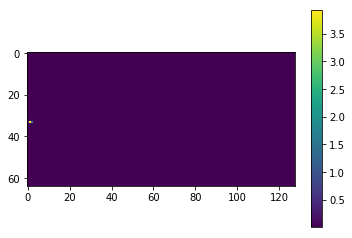

In [101]:
plt.imshow(np.max(BDT[3], axis=(0)))
plt.colorbar()

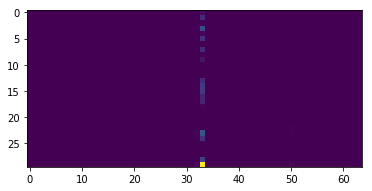

In [102]:
plt.imshow(np.max(BDT[3], axis=-1))

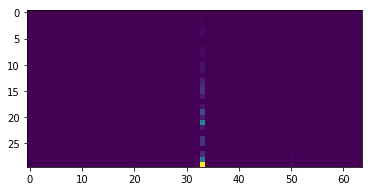

In [103]:
plt.imshow(np.max(BDQ[3], axis=-1))

In [104]:
np.argmax(np.max(BDT[-1], axis=(0,2)))

33

In [105]:
np.argmax(np.max(BDT[-1], axis=(0,1)))

1

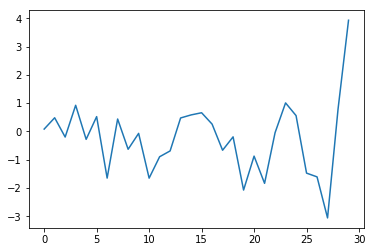

In [106]:
plt.plot(BDT[-1, :, 33, 1])

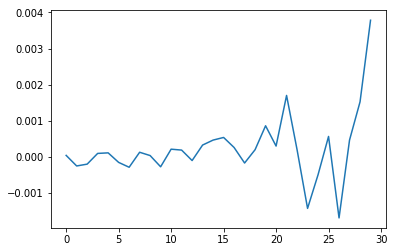

In [107]:
plt.plot(BDQ[-1, :, 33, 1])

In [109]:
inps_t3_norm = get_cb_inps(3); inps_t3_norm.shape

(152, 64, 128)

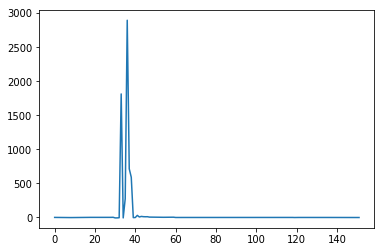

In [110]:
plt.plot(inps_t3_norm[:, 33, 1])

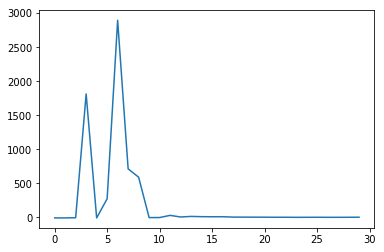

In [119]:
plt.plot(inps_t3_norm[30:60, 33, 1])

In [111]:
inps

['TC', 'QC', 'VC', 'dTdt_adiab', 'dQdt_adiab', 'PS', 'SOLIN']

In [112]:
inps_t3_raw = get_cb_inps(3, False)

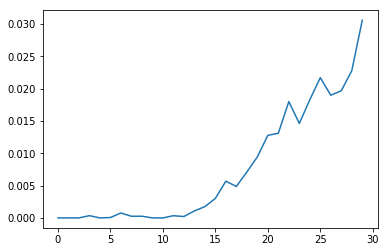

In [118]:
plt.plot(inps_t3_raw[30:60, 33, 1])

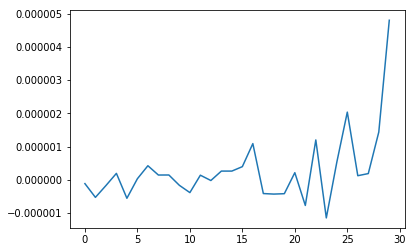

In [121]:
plt.plot(ds['BRAINDQ'][2, :, 33, 1])

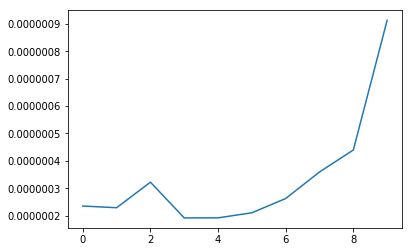

In [125]:
plt.plot(std[30:40])

## Check if variables are same...

In [70]:
TC.shape

(30, 64, 128)

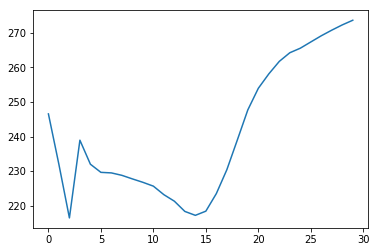

In [71]:
plt.plot(TC[:, 0, 0])

In [89]:
np.allclose(TC, ds['NNTC'][t])

True

In [90]:
np.allclose(QC, ds['NNQC'][t])

True

In [91]:
np.allclose(VC, ds['NNVC'][t])

True

In [283]:
np.allclose(dTdt_adiab, ds['dTdtadia'][t])

False

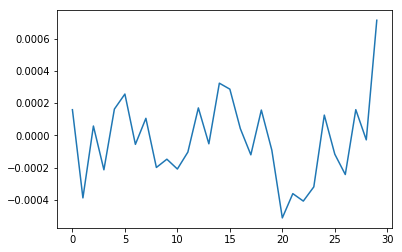

In [285]:
plt.plot(dTdt_adiab[:, 33, 0])

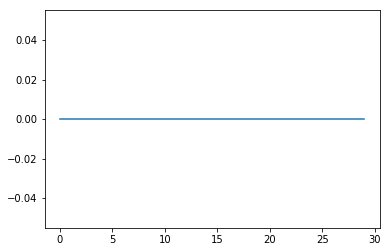

In [286]:
plt.plot(ds['dTdtadia'][t, :, 33, 0])

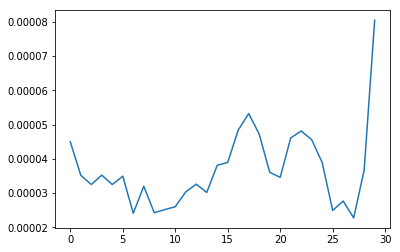

In [254]:
plt.plot(dTdt_adiab[:, 0, 0]-ds['dTdtadia'][t, :, 0, 0])

In [97]:
diff = (dTdt_adiab-ds['dTdtadia'][t])

In [102]:
diff.min(), diff.max(), dTdt_adiab.std()

(-3.1024683e-08, 3.2319804e-08, 5.7916106e-05)

In [288]:
np.allclose(dQdt_adiab, ds['dQdtadia'][t])

False

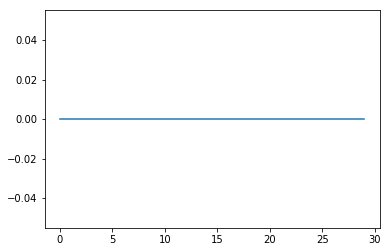

In [290]:
plt.plot(ds['dQdtadia'][t, :, 33, 0])

In [105]:
np.allclose(SOLIN, ds['NNSOLIN'][t])

False

In [108]:
SOLIN.shape

(1, 64, 128)

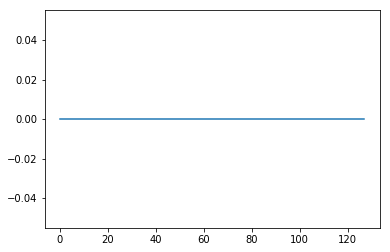

In [128]:
plt.plot(SOLIN[0, 30, :])

In [130]:
SOLIN.mean(), ds['SOLIN'][:].mean()

(0.0, 0.0)

In [112]:
ds['NNSOLIN'][t].mean()

326.2541

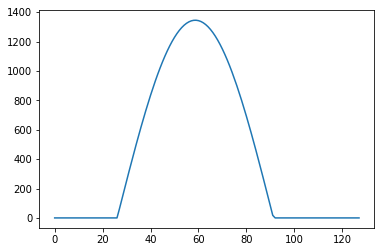

In [114]:
plt.plot(ds['NNSOLIN'][t, 30, :])

In [107]:
np.allclose(PS, ds['NNPS'][t])

False

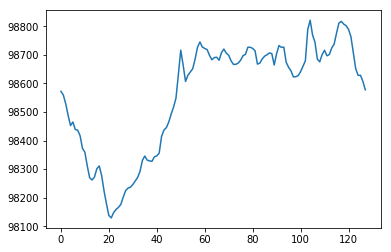

In [131]:
plt.plot(PS[0, 30, :])

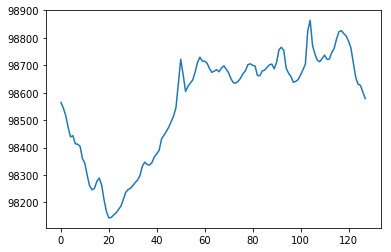

In [133]:
plt.plot(ds['NNPS'][t, 30, :])

In [136]:
diff = PS[0] - ds['NNPS'][t-1]

In [137]:
diff.mean(), diff.min(), diff.max(), PS[0].std()

(0.0, 0.0, 0.0, 1851.0485)

In [138]:
np.allclose(ds['PS'][:], ds['NNPS'][:])

True